#TRANSJAKARTA

Transjakarta merupakan salah satu moda transportasi publik utama di Jakarta yang setiap harinya melayani jutaan penumpang. Sebagai sistem transportasi massal, Transjakarta berperan penting dalam mendukung mobilitas masyarakat, mengurangi kemacetan, dan menyediakan alternatif perjalanan yang lebih efisien.

Namun, dengan tingginya volume penumpang, diperlukan analisis mendalam untuk **memahami pola penggunaan rute, waktu perjalanan, karakteristik penumpang, serta metode pembayaran.** Hal ini penting agar Transjakarta dapat mengoptimalkan operasional, mengatur kapasitas secara lebih tepat, serta meningkatkan pengalaman pengguna.

Melalui analisis data ini, fokus utama adalah menjawab pertanyaan-pertanyaan seperti: **rute mana yang paling padat dan paling sepi, kapan waktu tersibuk, bagaimana perbedaan pola perjalanan weekday vs weekend, bagaimana proporsi pengguna berdasarkan gender dan usia, serta metode pembayaran apa yang paling dominan digunakan.** Dengan menjawab pertanyaan tersebut, diharapkan hasil analisis ini dapat menjadi dasar untuk rekomendasi peningkatan layanan Transjakarta ke depannya.

jadi, **PROBLEM STATEMENT** :
"Bagaimana Transjakarta dapat mengoptimalkan operasional dan meningkatkan pengalaman pengguna melalui analisis kepadatan rute, pola perjalanan berdasarkan waktu, karakteristik penumpang, metode pembayaran"

- Operasional → Rute mana yang padat vs sepi, serta kapan waktu tersibuk.
- Perilaku Pengguna → Perbedaan penggunaan di weekday vs weekend, usia dan gender dominan.

- Metode Pembayaran → Jenis kartu paling sering digunakan serta perbandingan gratis vs bayar.


1. rute terpadat vs sepi
2. weekend vs weekday
3. free vs bayar
4. paycard yang sering digunakan
5. jam tersibuk / peak hour
6. age, gender siapa pengguna yang paling banyak
7. rata-rata nominal transaksi per pengguna, per rute, atau per jam
8. tren transaksi dari waktu ke waktu
9. persentase yang tidak tapout



##1. Data Preparation

In [ ]:
!pip install haversine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit

In [ ]:
#upload file dari url github
url = "https://raw.githubusercontent.com/hanihandayani2002/Portfolio/refs/heads/main/Transjakarta.csv"
df_tj = pd.read_csv(url)

In [ ]:
df_tj.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Dataset Transjakarta ini memiliki 22 kolom yaitu :
1. **transID**: ID transaksi unik untuk setiap transaksi.
2. **payCardID**: Identitas utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
3. **payCardBank**: Nama bank penerbit kartu pelanggan.
4. **payCardName**: Nama pelanggan yang tertanam dalam kartu.
5. **payCardSex**: Jenis kelamin pelanggan yang tertanam dalam kartu.
6. **payCardBirthDate**: Tahun lahir pelanggan.
7. **corridorID**: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. **corridorName**: Nama Koridor / Nama Rute yang berisi titik awal dan akhir untuk setiap rute.
9. **direction**: 0 untuk Pergi, 1 untuk Kembali. Arah perjalanan pada rute.
10. **tapInStops**: ID halte masuk (tap in) untuk mengidentifikasi nama halte.
11. **tapInStopsName**: Nama halte masuk (tap in) tempat pelanggan masuk.
12. **tapInStopsLat**: Latitude (garis lintang) dari halte masuk.
13. **tapInStopsLon**: Longitude (garis bujur) dari halte masuk.
14. **stopStartSeq**: Urutan halte, halte pertama, halte kedua, dst. Terkait dengan arah perjalanan.
15. **tapInTime**: Waktu masuk (tap in). Berisi tanggal dan jam.
16. **tapOutStops**: ID halte keluar (tap out) untuk mengidentifikasi nama halte.
17. **tapOutStopsName**: Nama halte keluar (tap out) tempat pelanggan keluar.
18. **tapOutStopsLat**: Latitude (garis lintang) dari halte keluar.
19. **tapOutStopsLon**: Longitude (garis bujur) dari halte keluar.
20. **stopEndSeq**: Urutan halte, halte pertama, halte kedua, dst. Terkait dengan arah perjalanan.
21. **tapOutTime**: Waktu keluar (tap out). Berisi tanggal dan jam.
22. **payAmount**: Jumlah yang dibayarkan pelanggan. Ada yang gratis, ada yang berbayar.

## 2. Data Understanding

In [ ]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

jumlah keseluruhan dataset adalah 37900. ada tipe data yang belum tepat seperti tipe data tapOutTime, tapIntime, paybirthdate, etc.

In [ ]:
df_tj.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,1257
corridorName,1930
direction,0
tapInStops,1213


dari data tersebut terlihat beberapa kolom yang memiliki missing value

In [ ]:
print(f"data duplikat :", df_tj.duplicated().sum())

data duplikat : 0


tidak terdapat data duplikat pada dataset transjakarta

In [ ]:
#analisis deskriptif semua data
display(df_tj.describe(), df_tj.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-17 18:14:19
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


1. payAMount - > Jumlah transaksi: 36.893 data terisi. Mean sekitar 2.699 rupiah, median (50%) = 3.500 rupiah → kemungkinan tarif standar.
Ada nilai maksimum 20.000 bisa jadi ada transportasi khusus atau jarak tempuh yang jauh
2. tapInTime / tapOutTime -> Ada 37.900 data masuk (tap in), tapi hanya 36.556 tap out → artinya ada transaksi tanpa tap out.
3. dari 6 jenis bank, 50% pengguna melakukan transaksi menggunakan bank DKI.
5. corridorID -> hanya 35970 dari 37900 data terisi, artinya ada missing value
6. koridor populer adalah cibubur-balaikota

In [ ]:
df_tj["payCardBank"].value_counts()

,count
payCardBank,
dki,18743
emoney,6866
brizzi,3531
flazz,3234
online,2869
bni,2657


ada 6 jenis metode pembayaran yaitu bank DKI, E-money, Brizzi, Flazz, Online, dan BNI

menampilkan missing value dari kolom payamount

In [ ]:
df_tj[df_tj["payAmount"].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
76,VHUC320U1S58CB,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,...,106.85910,1,2023-04-03 06:12:01,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-03 06:57:35,NaN
97,KFYK655N1H73XS,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0.0,P00087,...,106.78651,0,2023-04-03 06:03:19,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:04,NaN
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,...,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,NaN
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,...,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37661,PPYR040S6J76TM,4706129919148789,dki,Dt. Galuh Suryono,F,1987,M7B,BKN - Blok M,0.0,B03195P,...,106.84130,10,2023-04-16 13:52:59,B02877P,PLN Duren Tiga 1,-6.254389,106.83416,13.0,2023-04-16 16:38:08,NaN
37674,JXJU834Q7X41YL,4558670606659888636,brizzi,Tantri Siregar,M,1996,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B03305P,...,106.81794,10,2023-04-21 14:08:16,B03318P,Sawo Kecik Raya,-6.224852,106.85489,22.0,2023-04-21 16:56:14,NaN
37741,DEMB799H8M93RH,572311836488,flazz,Cornelia Haryanti,F,1989,3H,Jelambar - Kota,0.0,P00072,...,106.81545,7,2023-04-07 13:19:18,P00013,Kota,-6.136790,106.81490,10.0,2023-04-07 14:05:43,NaN
37861,EDZA126J0W55DK,3520040370814007,dki,Farah Latupono,M,2010,M1H,Tanah Abang - St. Gondangdia,0.0,B01232P,...,106.81827,8,2023-04-30 15:52:34,B02972P,Pospol Jati Bunder,-6.189707,106.81317,15.0,2023-04-30 18:38:25,NaN


ada 1007 data missing di payAmount, coba cek terlebih dahulu apakah data ini ada kesalahan dalam pencatatan

In [ ]:
#cek missing data coridor id dan coridorname
df_tj[df_tj["corridorID"].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
120,MCWO805A6Q66MX,3570416613897992,dki,"Gawati Damanik, S.E.",F,2010,NaN,NaN,0.0,P00109,...,106.86115,8,2023-04-03 06:38:44,P00224,Slamet Riyadi,-6.208533,106.85929,9.0,2023-04-03 07:32:11,3500.0
240,PTDK452M9A71XF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,NaN,NaN,0.0,B04505P,...,106.81934,13,2023-04-03 05:13:16,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:55,3500.0
250,OLZA217B5B95DK,4371940047525876160,brizzi,Zelda Laksita,M,2009,NaN,NaN,1.0,B04576P,...,106.73786,11,2023-04-03 06:24:37,B05009P,Simpang Meruya Ilir 1,-6.196682,106.75517,28.0,2023-04-03 07:13:18,0.0
257,GHEY769K9T55WF,4281653494791,online,Zelda Wibowo,M,1989,NaN,NaN,0.0,B00048P,...,106.92867,16,2023-04-03 05:05:24,B05823P,United Tractors 1,-6.183260,106.93243,28.0,2023-04-03 05:41:12,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37689,ZVAU363K8Z72QF,4235440226938980,dki,Tgk. Tari Wibowo,F,1989,NaN,NaN,1.0,P00014,...,106.89859,23,2023-04-28 19:01:21,P00192,Pulo Gadung 1,-6.183239,106.90907,24.0,2023-04-28 21:23:44,3500.0
37727,MGBX067C2V69EZ,213145593134816,emoney,Ulva Namaga,F,1995,NaN,NaN,1.0,P00146,...,106.81792,6,2023-04-16 17:38:14,P00092,Jembatan Merah,-6.146731,106.83427,9.0,2023-04-16 18:14:25,3500.0
37770,RGLG273G3M96TE,4725638979751926133,brizzi,"Murti Simanjuntak, M.Farm",M,1988,NaN,NaN,1.0,P00076,...,106.83237,11,2023-04-16 09:06:33,P00141,Pakin,-6.127982,106.80474,25.0,2023-04-16 11:14:06,3500.0
37797,HBLN935K0C66OQ,4667337468542,online,"drg. Bala Yolanda, S.Farm",M,1984,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04607P,...,106.95694,59,2023-04-29 19:18:55,B02223P,Marlindo Marunda,-6.121746,106.95715,61.0,2023-04-29 20:02:28,0.0


In [ ]:
df_tj[df_tj["corridorName"].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
38,RLLZ887W3V14WZ,4947438345710982,dki,Rahayu Rahayu,F,2006,5M,NaN,1.0,B02994P,...,106.84025,16,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,NaN,0.0,P00202,...,106.85809,9,2023-04-03 05:28:22,P00137,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
61,TWAK265Z0M88QR,213155263532652,emoney,Restu Waluyo,F,1984,12A,NaN,0.0,B05324P,...,106.79423,9,2023-04-03 06:13:03,P00138,Museum Fatahillah,-6.133930,106.81209,18.0,2023-04-03 06:50:23,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37792,HTYN200W0M88AC,4237219123070834,dki,Luwar Sihombing,M,2008,S31,NaN,1.0,B01184P,...,106.78705,2,2023-04-26 15:41:39,B03177P,RS Siloam,-6.292071,106.78467,3.0,2023-04-26 16:45:16,20000.0
37815,OSYS465Q5O68VD,3534140838249087,dki,Saka Pradipta,M,2009,JAK.56,NaN,1.0,B04394P,...,106.77141,45,2023-04-15 18:26:35,B05498P,St. Pesing,-6.161726,106.77127,52.0,2023-04-15 21:01:27,0.0
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,NaN,1.0,B01094P,...,106.78857,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0
37838,GTLM961T1U29JA,4204405669287580,dki,"Saka Wijaya, S.H.",M,1995,NaN,NaN,1.0,B03520P,...,106.94385,12,2023-04-28 12:30:26,B04078P,Sbr. Masjid Pasmar Marunda,-6.115928,106.95189,64.0,2023-04-28 13:59:57,0.0


setelah melihat coridor id dan coridor name kita bisa isi missing datanya sesuai koridor id dengan id yang sama dan not  null

## Cleaning Data
Pada tahap cleaning data kita akan melakukan beberapa tahapan yaitu :
-  Ubah tipe data
-  handling missing value




**Handling Missing Value**

In [ ]:
#isi coridorname berdasarkan coridorid not nnull dan sudah ada isi coridorname yang sama

# mapping hanya untuk corridorID yang valid
corridor_map = (
    df_tj.dropna(subset=["corridorID", "corridorName"])
      .drop_duplicates("corridorID")
      .set_index("corridorID")["corridorName"]
      .to_dict()
)

# isi hanya kalau corridorID tidak NaN
df_tj["corridorName"] = df_tj.apply(
    lambda row: corridor_map.get(row["corridorID"], row["corridorName"])
                if pd.notna(row["corridorID"]) else row["corridorName"],
    axis=1
)

setelah di fillna ternyata coridorname masih tetap ada missing value, ini artinya coridor id dan coridorname null yang mengakibatkan data masih missing.

selanjutnya kita akan coba fillna coridor id berdasarkan pola yang sama di kolom pada dataset transjakarta

In [ ]:
#lakukan hal yang sama seperti fillna coridorname
#isi coridorname berdasarkan coridorid not nnull dan sudah ada isi coridorname yang sama

# mapping hanya untuk corridorName yang valid
corridor_name_map = (
    df_tj.dropna(subset=["corridorName", "corridorID"])
      .drop_duplicates("corridorName")
      .set_index("corridorName")["corridorID"]
      .to_dict()
)

# isi hanya kalau corridorName tidak NaN
df_tj["corridorID"] = df_tj.apply(
    lambda row: corridor_name_map.get(row["corridorName"], row["corridorID"])
                if pd.notna(row["corridorName"]) else row["corridorID"],
    axis=1
)

In [ ]:
df_tj[["corridorID", "corridorName"]].isna().sum()

,0
corridorID,1125
corridorName,1125


data coridorID sudah di fill berdasarkan coridorName yang sesuai, namun masih ada missing value di kedua kolom yang artinya coridorID dan coridorName keduanya sama2 NaN.

selanjutnya cari lagi pola yang berkaitan dengan kedua kolom ini

coba isi berdasarkan TapInstopName dan tapoutstopname

In [ ]:
df_tj_2= df_tj[["corridorID","corridorName","tapInStops","tapOutStops"]].isnull().sum()
df_tj_2

,0
corridorID,1125
corridorName,1125
tapInStops,1213
tapOutStops,2289


In [ ]:
# df_tj_cek_corridor = df_tj.copy()

In [ ]:
mapping_corr = df_tj.copy()
mapping_corr.dropna(subset=['tapInStopsName', 'tapOutStopsName'], inplace=True)
mapping_corr

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [ ]:
#cek data null
df_tj_2 = df_tj.copy()
df_tj_2 = df_tj_2[df_tj_2['tapOutStopsName'].isnull() & df_tj_2['corridorID'].isnull() & df_tj_2['corridorName'].isnull()]
df_tj_2

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
826,UKDF137P0B97QW,4490538004709364,dki,Ajeng Pradipta,M,1975,NaN,NaN,1.0,P00232,...,106.874200,7,2023-04-04 06:59:07,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
876,GEAE866S8B17LJ,213115245142137,emoney,Estiono Simbolon,F,1994,NaN,NaN,1.0,B06119P,...,106.718340,27,2023-04-04 05:59:08,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2646,ESRK515O3G18KB,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,NaN,NaN,0.0,B05768P,...,107.016710,11,2023-04-07 05:07:37,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
2894,PFAD828X6S69ML,586818272435,flazz,"KH. Paiman Maheswara, S.I.Kom",M,1969,NaN,NaN,1.0,B01762P,...,106.883630,2,2023-04-07 16:48:23,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
3555,SIHZ691G8X15AR,676170059098,flazz,"Dt. Vinsen Budiyanto, S.H.",F,2009,NaN,NaN,0.0,P00074,...,106.789710,10,2023-04-10 16:05:39,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
3874,FQCP055R3E10MI,4673419635061948,dki,Martaka Wijaya,M,1989,NaN,NaN,0.0,B03824P,...,106.804820,24,2023-04-11 06:31:48,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4232,AXXX289A3P33HN,4905734029265594,dki,Ega Andriani,F,1990,NaN,NaN,0.0,B00102P,...,106.828470,12,2023-04-12 06:58:19,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
4540,SSFH084V6W32PI,574726750023,flazz,drg. Lukita Rajata,F,1983,NaN,NaN,1.0,B03236P,...,106.884930,1,2023-04-12 16:06:58,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4633,GPUO890F7L37GZ,30158257275842,bni,R. Yani Ardianto,F,1984,NaN,NaN,1.0,P00016,...,106.870000,0,2023-04-12 17:04:05,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
5084,ZFSR487U3Y31AH,5512989045494139,dki,Samsul Iswahyudi,F,2005,NaN,NaN,0.0,B03717P,...,106.824840,16,2023-04-13 05:20:50,NaN,NaN,NaN,NaN,NaN,NaN,0.0


"corridorID","corridorName","tapInStops","tapOutStops" ini di drop karna missing valuenya sisa 47

In [ ]:
df_tj_2.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,47
corridorName,47
direction,0
tapInStops,0


drop missing value karena tersisa 47 dan tidak bisa lagi untuk di handle, dari 37900 data 47 tidak mempengaruhi analisis

In [ ]:
# Hapus baris yang masih ada NaN di kolom penting
df_tj_clean = df_tj.dropna(subset=[
    'corridorID',
    'corridorName',
    'tapInStops',
    'tapOutStops',
    'tapOutStopsName',
    'tapOutStopsLat',
    'tapOutStopsLon',
    'stopEndSeq',
    'tapOutTime',
    'payAmount'
])

# Cek jumlah baris & kolom setelah bersih
print("Shape data:", df_tj_clean.shape)

# Pastikan sudah tidak ada null
df_tj_clean.isnull().sum()

Shape data: (32555, 22)


,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


In [ ]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           32555 non-null  object 
 1   payCardID         32555 non-null  int64  
 2   payCardBank       32555 non-null  object 
 3   payCardName       32555 non-null  object 
 4   payCardSex        32555 non-null  object 
 5   payCardBirthDate  32555 non-null  int64  
 6   corridorID        32555 non-null  object 
 7   corridorName      32555 non-null  object 
 8   direction         32555 non-null  float64
 9   tapInStops        32555 non-null  object 
 10  tapInStopsName    32555 non-null  object 
 11  tapInStopsLat     32555 non-null  float64
 12  tapInStopsLon     32555 non-null  float64
 13  stopStartSeq      32555 non-null  int64  
 14  tapInTime         32555 non-null  object 
 15  tapOutStops       32555 non-null  object 
 16  tapOutStopsName   32555 non-null  object 
 17

## Data Transformation / Feature Engineering

- buat kolom baru untuk age
- kolom baru untuk weekdays dan weekend atau day
- kolom durasi perjalanan
- kategori remaja/dewasa/lansia
- kategori waktu pagi/siang/sore/malam
- kategori hari
- kategori waktu

In [ ]:
df_tj_clean = df_tj_clean.copy()
df_tj_clean['age'] = 2023 - df_tj_clean['payCardBirthDate'] #cek outlier, klo ada outlier nanti handle dengan umur tidak diketahui
df_tj_clean['dayName'] = pd.to_datetime(df_tj_clean['tapInTime']).dt.day_name()
df_tj_clean['isweekend'] = df_tj_clean['dayName'].isin(['Saturday', 'Sunday']).astype(int) # 0 is weekdays and 1 weekend
df_tj_clean['date_tap_in'] = pd.to_datetime(df_tj_clean['tapInTime']).dt.date

#buat kolom kategori remaja,dewasa,lansia
# remaja 11-19, remaja 20-60, lansia >60
age_categories = [
    (df_tj_clean['age'] >= 11) & (df_tj_clean['age'] <= 19),
    (df_tj_clean['age'] >= 20) & (df_tj_clean['age'] <= 60),
    (df_tj_clean['age'] > 60)
]

scale = ['Remaja', 'Dewasa', 'Lansia']

df_tj_clean['age_category'] = np.select(age_categories, scale, default='Tidak diketahui')

# ubah tipe data menjadi datetime
df_tj_clean['tapInTime'] = pd.to_datetime(df_tj_clean['tapInTime'])
df_tj_clean['tapOutTime'] = pd.to_datetime(df_tj_clean['tapOutTime'])

# Buat kolom untuk mengambil jam saja
df_tj_clean['tapIn_hour'] = df_tj_clean['tapInTime'].dt.time
df_tj_clean['tapOut_hour'] = df_tj_clean['tapOutTime'].dt.time

# Ambil jam (integer) untuk kategori
tapIn_hour = df_tj_clean['tapInTime'].dt.hour
tapOut_hour = df_tj_clean['tapOutTime'].dt.hour

# Kategori waktu pagi -> 05:00 - 10:59,
# siang -> 11:00 - 15:59
#sore->16:00 - 18:59
#malam -> 19:00 - 22:59
time_in = [
    (tapIn_hour >= 5) & (tapIn_hour < 11),
    (tapIn_hour >= 11) & (tapIn_hour < 16),
    (tapIn_hour >= 16) & (tapIn_hour < 19),
    (tapIn_hour >= 19) & (tapIn_hour <= 23)
]
labels_time = ['Pagi', 'Siang', 'Sore', 'Malam']

df_tj_clean['tapIn_category'] = np.select(time_in, labels_time, default='Unknown') #buat kolom baru untuk memasukkan data label apakah pagi/siang/sore/malam

# buat kondisi untuk menentukan waktu
time_out = [
    (tapOut_hour >= 5) & (tapOut_hour < 11),
    (tapOut_hour >= 11) & (tapOut_hour < 16),
    (tapOut_hour >= 16) & (tapOut_hour < 19),
    (tapOut_hour >= 19) & (tapOut_hour <= 23)
]
df_tj_clean['tapout_category'] = np.select(time_out, labels_time, default='Unknown')

#buat kolom durasi perjalanan
df_tj_clean['duration_hour'] = df_tj_clean['tapOutTime'] - df_tj_clean['tapInTime']
df_tj_clean['Distance'] = df_tj_clean.apply(lambda row: haversine((row['tapInStopsLat'], row['tapInStopsLon']), (row['tapOutStopsLat'], row['tapOutStopsLon']), unit=Unit.KILOMETERS), axis=1)
# Ubah durasi ke menit
df_tj_clean['duration_min'] = pd.to_timedelta(df_tj_clean['duration_hour']).dt.total_seconds() / 60

buat kolom durasi perjalanan hitung tapouttime - timeintime dalam satu baris jika tidak ada, buat tidak diketahui jika datanya < 10 drop saja

In [ ]:
df_tj_clean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,0,2023-04-03,Remaja,05:21:44,06:00:53,Pagi,Pagi,0 days 00:39:09,2.514905,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,0,2023-04-03,Dewasa,05:42:44,06:40:01,Pagi,Pagi,0 days 00:57:17,2.019439,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,0,2023-04-03,Dewasa,05:59:06,06:50:55,Pagi,Pagi,0 days 00:51:49,0.079950,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,0,2023-04-03,Dewasa,05:44:51,06:28:16,Pagi,Pagi,0 days 00:43:25,1.456400,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,0,2023-04-03,Dewasa,06:17:35,06:57:03,Pagi,Pagi,0 days 00:39:28,8.721948,39.466667


In [ ]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transID           32555 non-null  object         
 1   payCardID         32555 non-null  int64          
 2   payCardBank       32555 non-null  object         
 3   payCardName       32555 non-null  object         
 4   payCardSex        32555 non-null  object         
 5   payCardBirthDate  32555 non-null  int64          
 6   corridorID        32555 non-null  object         
 7   corridorName      32555 non-null  object         
 8   direction         32555 non-null  float64        
 9   tapInStops        32555 non-null  object         
 10  tapInStopsName    32555 non-null  object         
 11  tapInStopsLat     32555 non-null  float64        
 12  tapInStopsLon     32555 non-null  float64        
 13  stopStartSeq      32555 non-null  int64          
 14  tapInTime  

In [ ]:
#ambil hanya durasi saja tanpa days
df_tj_clean['duration_hour'] = (pd.to_datetime(df_tj_clean['duration_hour'].dt.total_seconds(), unit='s').dt.strftime('%H:%M:%S'))

In [ ]:
df_tj_clean['duration_hour']

,duration_hour
0,00:39:09
1,00:57:17
2,00:51:49
3,00:43:25
4,00:39:28
...,...
37895,01:37:12
37896,00:35:51
37897,02:57:38
37898,00:28:24


In [ ]:
#tampilkan kolom coridor id dan tapinstopname tapoustopname,tapinhour,tapouthour dan duration category
df_tj_clean[['corridorID','corridorName','tapInStopsName','tapOutStopsName','tapIn_hour','tapOut_hour','duration_hour','tapOutTime','tapInTime']]

,corridorID,corridorName,tapInStopsName,tapOutStopsName,tapIn_hour,tapOut_hour,duration_hour,tapOutTime,tapInTime
0,5,Matraman Baru - Ancol,Pal Putih,Tegalan,05:21:44,06:00:53,00:39:09,2023-04-03 06:00:53,2023-04-03 05:21:44
1,6C,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,Sampoerna Strategic,05:42:44,06:40:01,00:57:17,2023-04-03 06:40:01,2023-04-03 05:42:44
2,R1A,Pantai Maju - Kota,Gg. Kunir II,Simpang Kunir Kemukus,05:59:06,06:50:55,00:51:49,2023-04-03 06:50:55,2023-04-03 05:59:06
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,Raya Penggilingan,05:44:51,06:28:16,00:43:25,2023-04-03 06:28:16,2023-04-03 05:44:51
4,12,Tanjung Priok - Pluit,Sunter Boulevard Barat,Kali Besar Barat,06:17:35,06:57:03,00:39:28,2023-04-03 06:57:03,2023-04-03 06:17:35
...,...,...,...,...,...,...,...,...,...
37895,6B,Ragunan - MH Thamrin via Semanggi,Tosari,SMK 57,18:18:37,19:55:49,01:37:12,2023-04-21 19:55:49,2023-04-21 18:18:37
37896,9N,Pinang Ranti - Pramuka,Garuda Taman Mini,Pinang Ranti,21:52:31,22:28:22,00:35:51,2023-04-18 22:28:22,2023-04-18 21:52:31
37897,1T,Cibubur - Balai Kota,Plaza Sentral,Buperta Cibubur,10:29:47,13:27:25,02:57:38,2023-04-04 13:27:25,2023-04-04 10:29:47
37898,JAK.13,Tanah Abang - Jembatan Lima,Museum Textile,JPO Blok G,19:59:26,20:27:50,00:28:24,2023-04-15 20:27:50,2023-04-15 19:59:26


dilihat dari duration hour, ada durasi yang mencolok yaitu dari koridor 6B ragunan MH thamrin menuju tosari dimana durasi perjalanannya 2 jam 57 menit.

In [ ]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32555 non-null  object        
 1   payCardID         32555 non-null  int64         
 2   payCardBank       32555 non-null  object        
 3   payCardName       32555 non-null  object        
 4   payCardSex        32555 non-null  object        
 5   payCardBirthDate  32555 non-null  int64         
 6   corridorID        32555 non-null  object        
 7   corridorName      32555 non-null  object        
 8   direction         32555 non-null  float64       
 9   tapInStops        32555 non-null  object        
 10  tapInStopsName    32555 non-null  object        
 11  tapInStopsLat     32555 non-null  float64       
 12  tapInStopsLon     32555 non-null  float64       
 13  stopStartSeq      32555 non-null  int64         
 14  tapInTime         32555 non

In [ ]:
df_tj_clean.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


# Exploratory Data Analysis (EDA)
- menjawab permasalahan yang ada pada dataset transjakarta
- distribusi data
- hubungan antar data
- visualisasi data
- menemukan insight pada data

In [ ]:
#cek deskripsi semua kolom
display(df_tj_clean.describe(), df_tj_clean.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,isweekend,Distance,duration_min
count,3.255500e+04,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555,32555.000000,32555.000000,32555.000000,32555,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000
mean,4.197717e+17,1990.193857,0.500384,-6.214765,106.841831,13.614437,2023-04-16 07:58:48.982337536,-6.214637,106.841581,21.311074,2023-04-16 09:11:01.312701696,2723.606205,32.806143,0.097374,2.781240,72.205506
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000,11.000000,0.000000,0.000000,15.000000
25%,1.800443e+14,1982.000000,0.000000,-6.245863,106.801940,4.000000,2023-04-10 08:58:50.500000,-6.248460,106.800940,11.000000,2023-04-10 10:15:02,0.000000,22.000000,0.000000,0.762970,51.150000
50%,3.507251e+15,1991.000000,1.000000,-6.214145,106.835200,10.000000,2023-04-16 17:39:25,-6.214423,106.834892,18.000000,2023-04-16 19:01:05,3500.000000,32.000000,0.000000,1.725094,72.083333
75%,4.684821e+15,2001.000000,1.000000,-6.174903,106.883630,19.000000,2023-04-21 21:36:13,-6.174207,106.884940,30.000000,2023-04-21 23:02:50.500000,3500.000000,41.000000,0.000000,3.375152,95.783333
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:08,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000,77.000000,1.000000,22.651552,179.050000
std,1.315105e+18,13.066053,0.500008,0.058475,0.061149,12.276359,NaN,0.059651,0.061833,13.900599,NaN,4254.492902,13.066053,0.296470,3.283625,28.077307


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName,dayName,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour
count,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555
unique,32555,6,1924,2,211,211,2452,2451,2151,2150,7,30,3,22423,23535,4,5,6133
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN,Friday,2023-04-17,Dewasa,17:40:47,18:44:46,Pagi,Pagi,00:52:03
freq,1,16133,71,17350,371,371,213,213,284,284,5903,1735,25806,7,7,15441,14485,17


1. Mayoritas pengguna adalah dewasa usia produktif dengan umur rata-rata 33 tahun.

2. Bank DKI paling dominan sebagai alat pembayaran.

3. Perjalanan lebih sering dilakukan pada hari kerja, khususnya Jumat.

4. Jam sibuk terlihat dari mode tap-in sore (17:40) → jam pulang kerja.

5. Sebagian besar tarif Rp3.500 → flat rate TJ, tapi ada variasi hingga Rp20.000 (long distance/premium).

6. Durasi perjalanan normal ± 1 jam, namun ada variasi signifikan yaitu 2 jam lebih ini bisa dibilang outlier

**1. cek kolom satu persatu - satu apakah ada anomali / outlier**

In [ ]:
#tampilkan durasi perjalanan lebih dari 2 jam
df_tj_clean[df_tj_clean['duration_hour'] > '02:00:00']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
37600,JBXW168V4D98VE,561500422432,flazz,"Sabrina Megantara, M.Farm",F,2007,10A,Rusun Marunda - Tanjung Priok,0.0,B05078P,...,1,2023-04-30,Remaja,17:08:35,19:48:13,Sore,Malam,02:39:38,7.618848,159.633333
37604,ZJAT331Y6W27DI,6567245294939171,dki,Makuta Hasanah,M,2010,10,Tanjung Priok - PGC 2,1.0,P00042,...,0,2023-04-14,Remaja,05:40:20,07:51:08,Pagi,Pagi,02:10:48,6.388382,130.800000
37605,GBFW072V7E05FE,4721230793157234,dki,Safina Lazuardi,M,2008,11C,Rusun Pinus Elok - Rusun Pulo Gebang,0.0,B04898P,...,0,2023-04-06,Remaja,06:03:19,08:46:08,Pagi,Pagi,02:42:49,1.124985,162.816667
37607,GQAJ763W9T67MQ,4381256169826731,dki,Cawisadi Hartati,M,1972,6A,Ragunan - MH Thamrin via Kuningan,0.0,P00164,...,0,2023-04-03,Dewasa,06:24:11,08:40:36,Pagi,Pagi,02:16:25,1.783578,136.416667
37608,JPVH867T7U10EV,576927814706,flazz,Lili Siregar,M,1982,M1,Blok M - Kota,1.0,P00025,...,0,2023-04-17,Dewasa,09:19:15,12:02:28,Pagi,Siang,02:43:13,6.065434,163.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,Rusun Flamboyan - Cengkareng,1.0,B04610P,...,1,2023-04-08,Dewasa,10:46:06,13:06:42,Pagi,Siang,02:20:36,0.201712,140.600000
37888,KWQA944F9O89IN,6585885975007109,dki,Hardana Gunarto,F,1982,B14,Bekasi Barat - Kuningan,0.0,B00664P,...,0,2023-04-05,Dewasa,09:30:00,11:58:54,Pagi,Siang,02:28:54,1.399265,148.900000
37891,XQDZ821C9G88JD,2712823212983860,dki,"drg. Maras Wibowo, S.Ked",F,1966,JAK.30,Grogol - Meruya via Roxy,1.0,B01209P,...,0,2023-04-19,Dewasa,16:31:09,19:13:53,Sore,Malam,02:42:44,6.413789,162.733333
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,...,0,2023-04-19,Dewasa,08:16:10,10:32:30,Pagi,Pagi,02:16:20,0.601680,136.333333


ternyata ada 93 row dengan  durasi perjalanan yang lebih dari 2 jam, apakah durasi perjalanan ini normal atau ada hambatan yang membuat rute ini menjadi 2 jam perjalanan?

In [ ]:
df_test = df_tj_clean.copy()
df_test[df_test['Distance'] > 10]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,0,2023-04-03,Dewasa,06:01:44,06:51:12,Pagi,Pagi,00:49:28,18.326286,49.466667
18,SBPQ144H4S45RA,502034641014,flazz,"Adikara Kurniawan, S.Sos",M,2003,M9,Pinang Ranti - Pluit,1.0,P00093,...,0,2023-04-03,Dewasa,06:24:23,07:07:12,Pagi,Pagi,00:42:49,13.469638,42.816667
20,MEFW094B7A84RS,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,...,0,2023-04-03,Remaja,05:13:08,06:08:59,Pagi,Pagi,00:55:51,14.619947,55.850000
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,...,0,2023-04-03,Remaja,05:43:48,06:09:12,Pagi,Pagi,00:25:24,21.065531,25.400000
73,UCMI767D7M79GS,4766007569419196,dki,"Danu Suartini, S.Farm",M,2010,M3,Kalideres - Bundaran HI via Veteran,1.0,P00237,...,0,2023-04-03,Remaja,06:49:46,07:21:09,Pagi,Pagi,00:31:23,12.023594,31.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37842,PRHD702O0R90KN,5209931277664722,dki,R.M. Taufan Maryadi,F,1975,S22,Ciputat - Kampung Rambutan,0.0,B01481P,...,0,2023-04-18,Dewasa,06:02:33,07:52:44,Pagi,Pagi,01:50:11,12.529876,110.183333
37854,AMQA420I2P82KP,3553882732550120,dki,Siti Rahimah,M,1994,6P,Cibubur - Kuningan,1.0,B00596P,...,0,2023-04-03,Dewasa,17:56:55,18:21:26,Sore,Sore,00:24:31,16.965416,24.516667
37886,IFPF807G7R92DX,213160779285738,emoney,"R. Putri Kusumo, S.E.I",F,1997,1A,Pantai Maju - Balai Kota,0.0,B06040P,...,1,2023-04-09,Dewasa,15:45:24,17:44:38,Siang,Sore,01:59:14,10.330038,119.233333
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,0,2023-04-21,Remaja,18:18:37,19:55:49,Sore,Malam,01:37:12,10.460860,97.200000


Sebelum masuk ke detail analisis, ada beberapa pertanyaan utama yang ingin dijawab dari data ini, di antaranya: rute mana yang paling padat dan paling sepi, perbedaan pola penggunaan antara weekday dan weekend, perbandingan pengguna gratis dan berbayar, hingga demografi pengguna berdasarkan usia dan gender. Dengan menjawab pertanyaan-pertanyaan ini, kita bisa mendapatkan gambaran yang lebih komprehensif mengenai pola penggunaan transportasi.

#1. Rute terpadat vs sepi

pada tahap ini dilakukan analisis untuk mengetahui 10 rute paling padat dan 10 rute paling sepi berdasarkan jumlah transaksi pada masing-masing koridor. Tujuannya untuk memahami pola penggunaan rute dan mendukung pengambilan keputusan terkait pengelolaan transportas

In [ ]:
#TOP 10
top_10 = (
    df_tj_clean.groupby('corridorName')
      .size()
      .reset_index(name='count')
      .sort_values(by='count', ascending=False)
      .head(10)
)

display(top_10)   # top 10 terpadat

,corridorName,count
20,Cibubur - Balai Kota,371
32,Ciputat - CSW,355
46,Harmoni - Jakarta International Stadium,318
114,Pulo Gadung - Monas,317
71,Kampung Rambutan - Pondok Gede,308
53,Kalideres - Bundaran HI via Veteran,304
155,Rusun Pondok Bambu - Walikota Jakarta Timur,303
75,Kebayoran Lama - Tanah Abang,297
157,Rusun Rawa Bebek - Kodamar,289
100,Pasar Minggu - Tanah Abang,285


In [ ]:
#bottom 10
bottom_10 = (
    df_tj_clean.groupby('corridorName')
      .size()
      .reset_index(name='count')
      .sort_values(by='count', ascending=True)
      .head(10)
)
display(bottom_10)   # bottom 10 tersepi

,corridorName,count
65,Kampung Rambutan - Blok M,17
188,Tanah Abang - Kebayoran Lama via Pos Pengumben,22
200,Term. Pulo Gadung - Lampiri,28
170,Senen - Tanah Abang,36
37,Gondangdia - Balai Kota,37
41,Grogol - Pos Pengumben via Slipi,37
110,Pondok Kelapa - BKN,45
172,Stasiun Manggarai - Blok M,49
171,St. LRT Pegangsaan Dua - JIS,50
154,Rusun Pinus Elok - Rusun Pulo Gebang,52


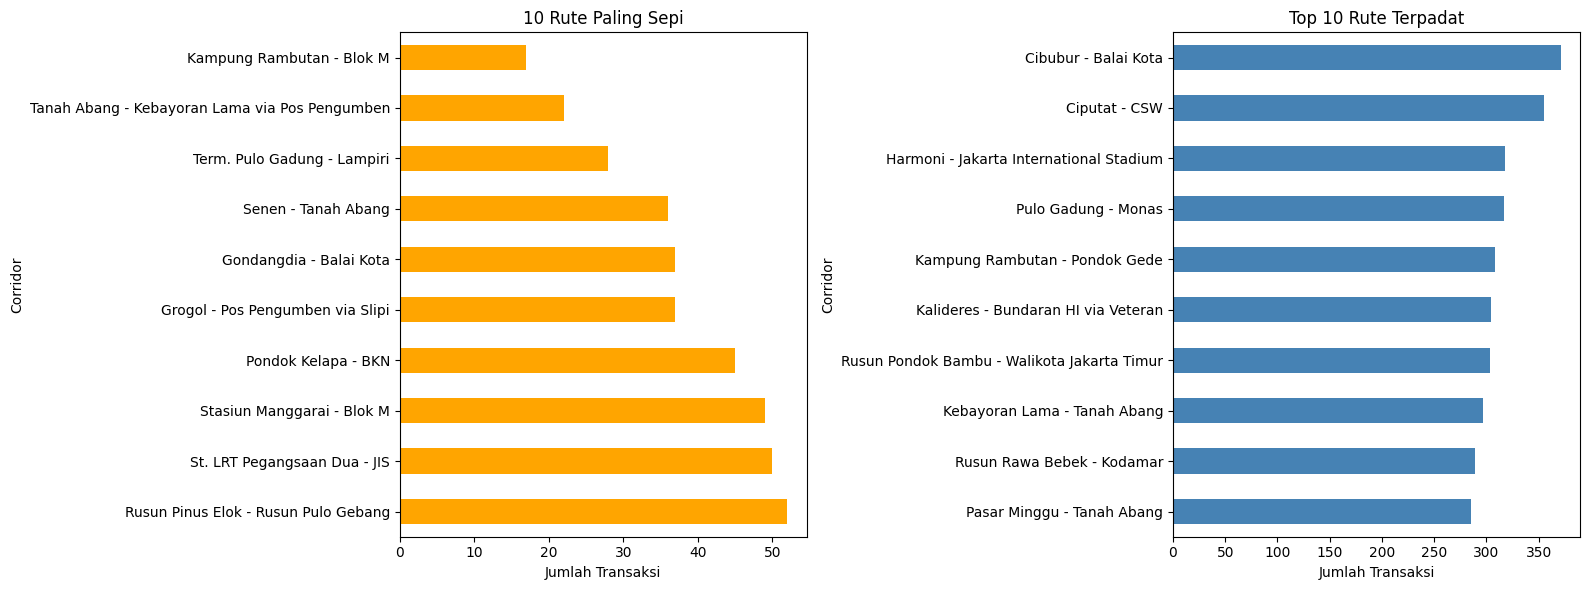

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))  # 1 baris, 2 kolom

# Bottom 10
bottom_10.sort_values(by='count', ascending=True).iloc[::-1].plot(
    x='corridorName',
    y='count',
    kind='barh',
    ax=axes[0],
    legend=False,
    color="orange"
)
axes[0].set_title("10 Rute Paling Sepi")
axes[0].set_xlabel("Jumlah Transaksi")
axes[0].set_ylabel("Corridor")

# Top 10
top_10.sort_values(by='count', ascending=True).plot(
    x='corridorName',
    y='count',
    kind='barh',
    ax=axes[1],
    legend=False,
    color="steelblue"
)
axes[1].set_title("Top 10 Rute Terpadat")
axes[1].set_xlabel("Jumlah Transaksi")
axes[1].set_ylabel("Corridor")

plt.tight_layout()
plt.show()


Rute yang paling banyak digunakan penumpang adalah Cibubur – Balai Kota dan Ciputat – CSW, sedangkan rute yang paling sedikit digunakan adalah Blok M, dengan hanya tercatat 17 transaksi

In [ ]:
top_10['corridorName'].to_list()
df_tj_top = df_tj_clean.copy()
df_tj_top= df_tj_top[df_tj_top['corridorName'].isin(top_10['corridorName'].to_list())]
df_tj_top.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,0,2023-04-03,Dewasa,05:08:01,05:52:25,Pagi,Pagi,00:44:24,0.732290,44.400000
37,WQXL397G5U61OY,639040388584,flazz,"Galang Megantara, S.Ked",M,1989,JIS3,Harmoni - Jakarta International Stadium,0.0,P00114,...,0,2023-04-03,Dewasa,06:32:51,07:20:21,Pagi,Pagi,00:47:30,3.357905,47.500000
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,Pulo Gadung - Monas,0.0,P00202,...,0,2023-04-03,Dewasa,05:28:22,06:02:36,Pagi,Pagi,00:34:14,3.903230,34.233333
48,ELVU605Z3W26IF,2718070346782735,dki,Asman Uyainah,F,2005,2,Pulo Gadung - Monas,0.0,P00202,...,0,2023-04-03,Remaja,06:35:17,07:17:52,Pagi,Pagi,00:42:35,3.376938,42.583333
56,NICD824U6H93DE,4380875529452127,dki,Tirtayasa Sitorus,F,1988,JAK.06,Kampung Rambutan - Pondok Gede,0.0,B01301P,...,0,2023-04-03,Dewasa,05:37:47,06:06:12,Pagi,Pagi,00:28:25,1.346921,28.416667


**rute terpadat vs tersepi base on direction**

In [ ]:
#TOP 10 base on direction
top_10_2 = (
    df_tj_top.groupby(['corridorName','direction'])
      .size()
      .reset_index(name='count')
      .sort_values(by='corridorName', ascending=True)
      .head(20)
)

display(top_10_2.head(20))   # top 10 terpadat di breakdown by direction 0 -> Go, 1 -> back

,corridorName,direction,count
0,Cibubur - Balai Kota,0.0,182
1,Cibubur - Balai Kota,1.0,189
2,Ciputat - CSW,0.0,178
3,Ciputat - CSW,1.0,177
4,Harmoni - Jakarta International Stadium,0.0,156
5,Harmoni - Jakarta International Stadium,1.0,162
6,Kalideres - Bundaran HI via Veteran,0.0,147
7,Kalideres - Bundaran HI via Veteran,1.0,157
9,Kampung Rambutan - Pondok Gede,1.0,154
8,Kampung Rambutan - Pondok Gede,0.0,154


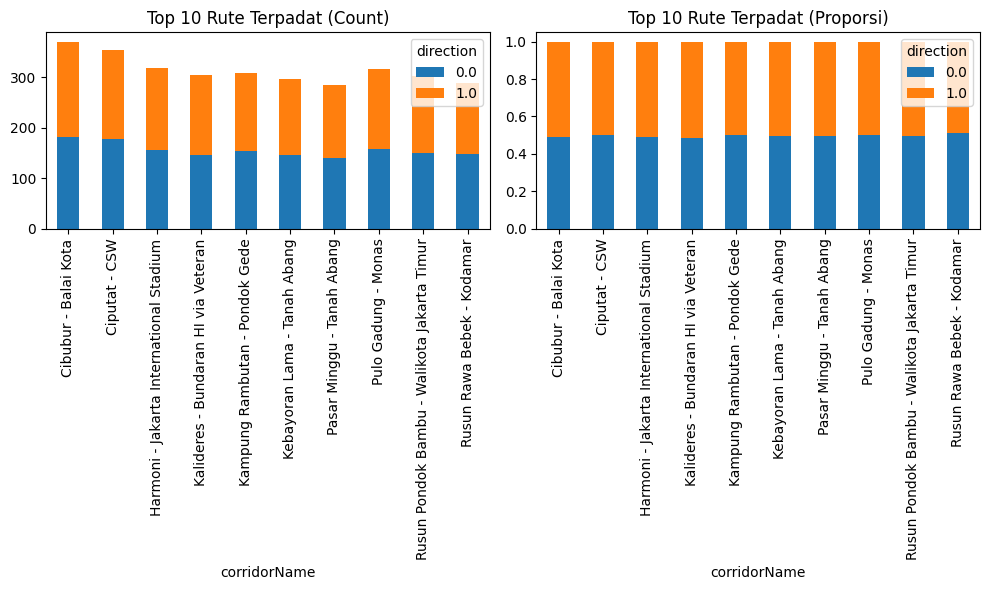

In [ ]:

pvt = top_10_2.pivot_table(index='corridorName', columns='direction', values='count', aggfunc='sum')
pvt_2 = pvt.div(pvt.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Plot pertama
pvt.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Top 10 Rute Terpadat (Count)")

# Plot kedua (normalisasi)
pvt_2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Top 10 Rute Terpadat (Proporsi)")

plt.tight_layout()
plt.show()
# plt.title("Top 10 Rute Terpadat")
# plt.xlabel("Jumlah Transaksi")
# plt.ylabel("Corridor")
# plt.tight_layout()

In [ ]:
#bottom 10 base on direction
bottom_10_2 = (
    df_tj_clean.groupby(['corridorName','direction'])
      .size()
      .reset_index(name='count')
      .sort_values(by='count', ascending=True)
      .head(10)
)
display(bottom_10_2)   # bottom 10 tersepi

,corridorName,direction,count
131,Kampung Rambutan - Blok M,1.0,8
130,Kampung Rambutan - Blok M,0.0,9
401,Term. Pulo Gadung - Lampiri,1.0,10
376,Tanah Abang - Kebayoran Lama via Pos Pengumben,0.0,10
377,Tanah Abang - Kebayoran Lama via Pos Pengumben,1.0,12
74,Gondangdia - Balai Kota,0.0,15
340,Senen - Tanah Abang,0.0,17
83,Grogol - Pos Pengumben via Slipi,1.0,18
400,Term. Pulo Gadung - Lampiri,0.0,18
82,Grogol - Pos Pengumben via Slipi,0.0,19


# 2. Pay vs Free

In [ ]:
pay_count = df_tj_clean['payAmount'].value_counts()
pay_count

,count
payAmount,
3500.0,16322
0.0,14656
20000.0,1577


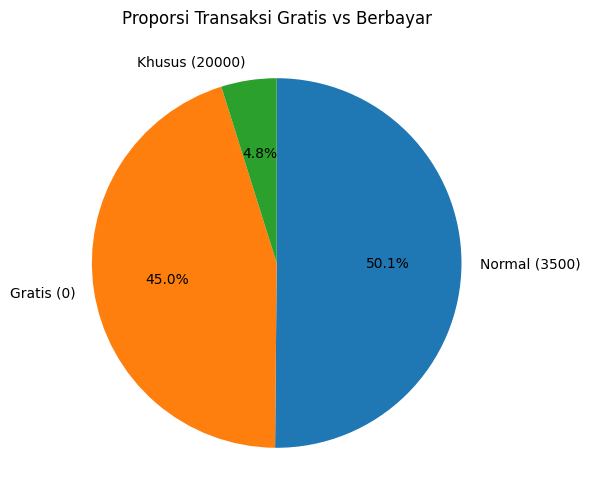

In [ ]:
label_map = {0: 'Gratis (0)', 3500: 'Normal (3500)', 20000: 'Khusus (20000)'}

# Hitung jumlah transaksi
pay_count = df_tj_clean['payAmount'].value_counts()

# Mapping index
pay_count.index = pay_count.index.map(label_map)

plt.figure(figsize=(6,6))
plt.pie(pay_count, labels=pay_count.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proporsi Transaksi Gratis vs Berbayar')
plt.show()

dari distribusi payment terlihat bahwa transaksi normal 3500 mendominasi dengan selisih hanya 5% dibandingkan gratis. ini menunjukkan bahwa program subsidi/gratis cukup banyak dimanfaatkan pengguna, hampir setara dengan jumlah transaksi berbayar normal. sementara tarif khusus hanya 4,8% transaksi.

**kenapa bisa ada transaksi free dan bayar?**

Transajakarta memang menyediakan layanan gratis bagi masyarakat yang memenuhi kategori dan syarat. ada beberapa kategori yang bisa mendapatkan subsidi/gratis .


**sekarang kita ingin analisis lebih dalam, siapa saja yang mendapatkan subsidi ini?**

In [ ]:
#kategori usia yang paling banyak mendapatkan 0 pembayaran
age_sub = df_tj_clean[df_tj_clean['payAmount'] == 0]['age_category'].value_counts()

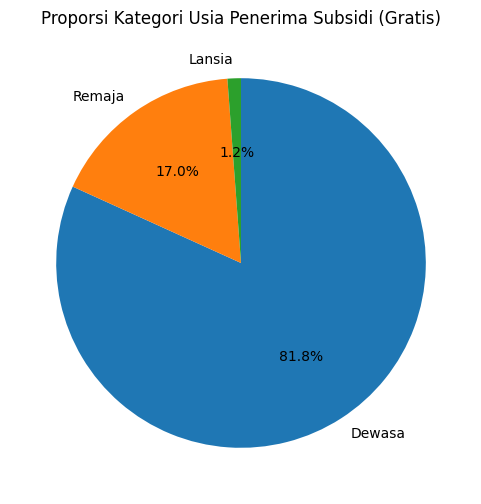

In [ ]:
#visualisasi dengan piechart
# Ambil hanya kategori usia dari transaksi gratis (subsidi)
age_sub = df_tj_clean[df_tj_clean['payAmount'] == 0]['age_category'].value_counts()

# Pie chart kategori usia yang mendapatkan subsidi
plt.figure(figsize=(6,6))
plt.pie(age_sub, labels=age_sub.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proporsi Kategori Usia Penerima Subsidi (Gratis)')
plt.show()

ternyata mayoritas kategori usia yang mendapatkan subsidi gratis adalah kategori usia **'Dewasa'**, namun Lansia hanya 1,2% padahal lansia yang usia diatas 60 tahun masuk kategori usia yang mendapatkan subsidi gratis. (berarti perlu sosialisasi lebih lanjut agar tepat sasaran yang mendpatkan subsidi, fokus juga ke lansia mungkin aja tidak ada yang memberitahu untuk mendaftarkan diri agar mendapat subsidi gratis naik transjakarta)




cara mendapatkan subsidi gratis transjakarta adalah dengan cara mendaftarkan diri melalui situs resmi Klg.transjakarta.co.id dengan mengunggah beberapa dokumen yang diperlukan.

selain itu syarat atau kategori yang mendapatkan subsidi ada 15 kategori diantaranya :

untuk penerima Layanan Gratis dengan kartu Jakcard Combo meliputi golongan-golongan berikut:

1. Pegawai Negeri Sipil Pemprov DKI Jakarta dan pensiunannya;
2. Tenaga Kontrak yang bekerja di Pemprov DKI;
3. Pemilik Kartu Jakarta Pintar (KJP);
4. Karyawan Swasta tertentu/Pekerja (Gaji sesuai UMP melalui Bank DKI);
5. Penghuni Rumah Susun Sederhana Sewa;
6. Tim Penggerak Pemberdayaan dan Kesejahteraan Keluarga.
**Keenam golongan penerima Layanan Gratis dengan Jakcard Combo tersebut dapat melakukan pendaftaran program dengan menghubungi Bank DKI.**

Sementara itu, penerima Layanan Gratis dengan TJ Card:
Pembayaran tiket Transjakarta (TJ) dapat dilakukan menggunakan kartu uang elektronik seperti JakLingko, e-money, Flazz, atau Brizzi **bold text**

7. Lanjut usia 60 tahun ke atas (lansia);
8. Penyandang disabilitas;
9. Anggota Veteran Republik Indonesia;
10. Penerima Raskin (pemilik Kartu Keluarga Sejahtera);
11. Penduduk pemilik KTP Kepulauan Seribu;
12. Pengurus masjid (marbot);
13. Pendidik dan tenaga Pendidikan Anak Usia Dini (PAUD);
14. Anggota TNI/Polri.
15. larva monitor


In [ ]:
# Filter data dengan payAmount = 0
df_free = df_tj_clean[df_tj_clean['payAmount'] == 0]
#crosstab untuk silang data
pd.crosstab(df_free['age_category'], df_free['payCardBank'])

payCardBank,bni,brizzi,dki,emoney,flazz,online
age_category,,,,,,
Dewasa,643,890,6577,1946,889,1041
Lansia,4,0,123,35,5,5
Remaja,356,309,1040,506,124,163


jika dilihat dari paycardBank yang paling banyak dapat subsidi adalah pengguna Bank DKI. Bank DKI dominan untuk kategori Dewasa (6577 transaksi gratis).
- Remaja juga cukup banyak yang gratis pakai Bank DKI (1040).
- Lansia walau kecil jumlahnya, mayoritas juga pakai Bank DKI (123).
- Ada distribusi signifikan di kartu lain (BNI, Brizzi, Emoney, Flazz, Online) → ini kemungkinan masuk golongan non-Bank DKI (golongan 7–15 sesuai info dari website TJ).

**tapi kenapa dewasa paling dominan mendapatkan subsidi, apakah benar semuanya karena pengguna bank DKI, atau PNS sehingga mendapatkan subsidi?**

selanjutnya kita akan coba melihat pola data, kenapa banyak yang mendapatkan subsidi. apakah ada pola tertentu selain dari kriteria pengguna yang ada di website transjakarta?

In [ ]:
#tampilkan tabel yang payamount== 0 berdasarkan kolom koridor id dan koridor name
df_tj_clean[df_tj_clean['payAmount'] == 0].groupby(['corridorID','corridorName','payAmount']).size().reset_index(name='count')

,corridorID,corridorName,payAmount,count
0,10A,Rusun Marunda - Tanjung Priok,0.0,132
1,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,0.0,117
2,11B,Rusun Rawa Bebek - Penggilingan,0.0,85
3,11C,Rusun Pinus Elok - Rusun Pulo Gebang,0.0,52
4,11K,Rusun Komarudin - Penggilingan,0.0,129
...,...,...,...,...
93,JAK.84,Terminal Kampung Melayu - Kapin Raya,0.0,83
94,JAK.85,Bintara - Cipinang Indah,0.0,127
95,JAK.86,Term. Rawamangun - Term. Manggarai,0.0,173
96,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,171


Menariknya, terdapat pola yang konsisten ketika data dilihat berdasarkan corridor ID, payAmount = 0, serta corridorName.

**Corridor ID ‘JAK’** merupakan layanan mikrotrans yang memang digratiskan.

**Corridor ID ‘BW9’** adalah bus pariwisata dengan rute Monas – Pantai Indah Kapuk, yang juga termasuk kategori bus gratis.

Sementara itu, corridor ID yang berawalan angka menunjukkan **rute menuju rumah susun (Rusun)**. Berdasarkan informasi dari Transjakarta, rute ini diasumsikan mendapat subsidi, karena ditujukan bagi para penghuni Rusun.

/tmp/ipython-input-952790953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gratis['corridor_group'] = df_gratis['corridorID'].apply(lambda x: 'JAK' if str(x).startswith('JAK') else x)


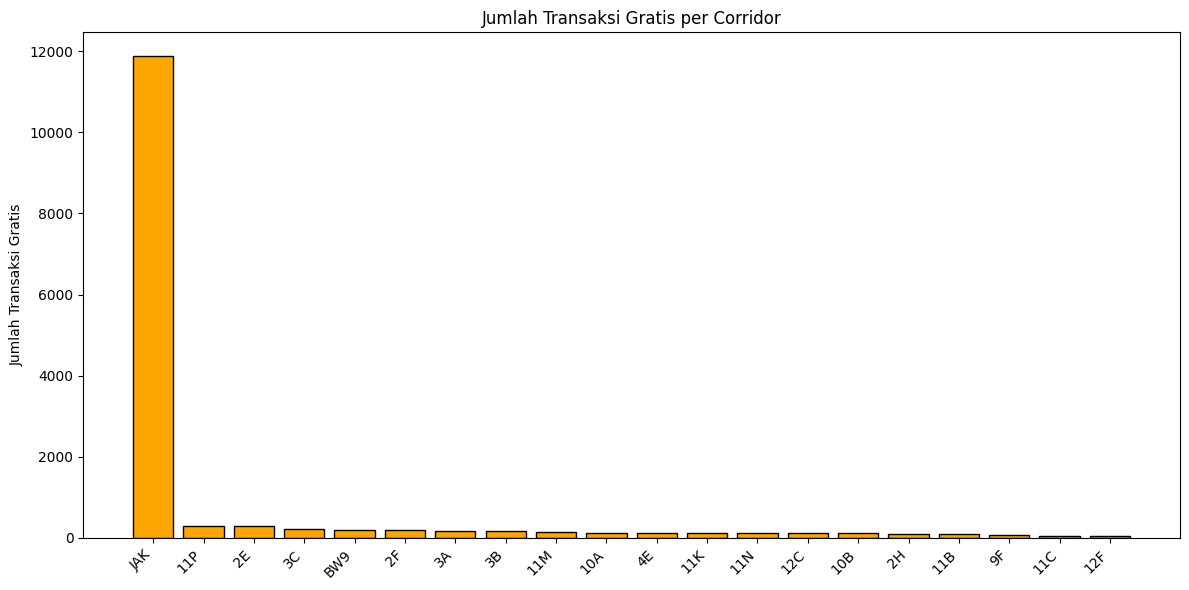

In [ ]:
import matplotlib.pyplot as plt

df_copy = df_tj_clean.copy()

# Filter hanya transaksi gratis
df_gratis = df_copy[df_copy['payAmount'] == 0]

# Buat kolom baru 'corridor_group' untuk gabungin yang diawali 'JAK'
df_gratis['corridor_group'] = df_gratis['corridorID'].apply(lambda x: 'JAK' if str(x).startswith('JAK') else x)

# Hitung jumlah transaksi gratis per corridor_group
totals_grouped = df_gratis['corridor_group'].value_counts().sort_values(ascending=False)

# Ambil top 10 yang paling banyak
top_corridors = totals_grouped

# Visualisasi
plt.figure(figsize=(12,6))
plt.bar(top_corridors.index, top_corridors.values, color='orange', edgecolor='black')
plt.title('Jumlah Transaksi Gratis per Corridor')
plt.ylabel('Jumlah Transaksi Gratis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


koridorid gratis yang paling sering digunakan adalah koridor ID yaitu layanan mikrotrans

In [ ]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32555 non-null  object        
 1   payCardID         32555 non-null  int64         
 2   payCardBank       32555 non-null  object        
 3   payCardName       32555 non-null  object        
 4   payCardSex        32555 non-null  object        
 5   payCardBirthDate  32555 non-null  int64         
 6   corridorID        32555 non-null  object        
 7   corridorName      32555 non-null  object        
 8   direction         32555 non-null  float64       
 9   tapInStops        32555 non-null  object        
 10  tapInStopsName    32555 non-null  object        
 11  tapInStopsLat     32555 non-null  float64       
 12  tapInStopsLon     32555 non-null  float64       
 13  stopStartSeq      32555 non-null  int64         
 14  tapInTime         32555 non

#2. weekend vs weekday

perbedaan frekuensi penumpang pada saat weekend dan weekdays

/tmp/ipython-input-2823432426.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='isweekend', y='transID',hue = 'isweekend', data=week_count, ci=None)


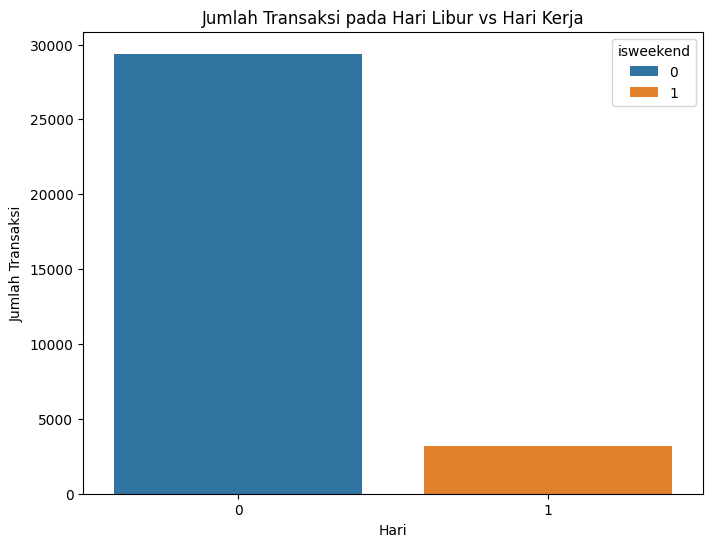

In [ ]:

#0 -> weekdays 1-> weekend
week_count = (
    df_tj_clean.groupby('isweekend')['transID'].count().reset_index()
)
#visualisasi weekend dan weekdays

plt.figure(figsize=(8,6))
sns.barplot(x='isweekend', y='transID',hue = 'isweekend', data=week_count, ci=None)
plt.title('Jumlah Transaksi pada Hari Libur vs Hari Kerja')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.show()

ternyata  mayoritas transaksi terjadi pada **hari kerja** dibandingkan akhir pekan. hal ini menunjukkan bahwa layanan Transjakarta lebih banyak dimanfaatkan untuk aktivitas rutin seperti bekerja atau sekolah dibandingkan dengan aktivitas rekreasi di akhir pekan

# 4. Paycard yang paling banyak digunakan

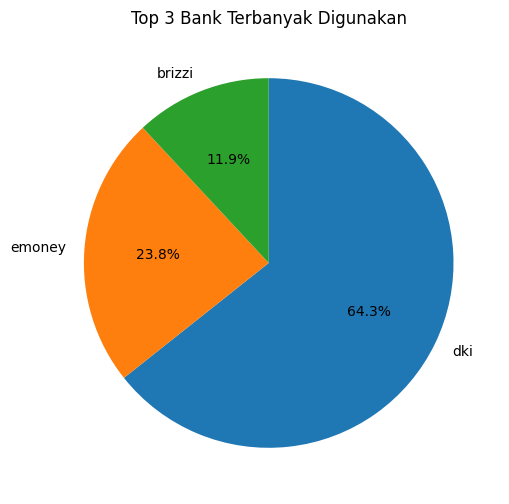

In [ ]:
# barchart paycard top 3
top_3_bank = df_tj_clean['payCardBank'].value_counts()

# piechart paycard top 3
top_3_bank = df_tj_clean['payCardBank'].value_counts().head(3)

plt.figure(figsize=(6,6))
plt.pie(top_3_bank, labels=top_3_bank.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Top 3 Bank Terbanyak Digunakan')
plt.show()

bank DKI menjadi paycard paling banyak digunakan oleh pengguna transjakarta. ini bisa saja berhubungan dengan subsidi gratis transjakarta karena transjakarta bekerja sama dengan bank dki

### distribusi Durasi perjalanan

In [ ]:
import numpy as np
import pandas as pd


# Deteksi Outlier dengan IQR
Q1 = df_tj_clean['duration_min'].quantile(0.25) #kuartil bawah 25% data terendah
Q3 = df_tj_clean['duration_min'].quantile(0.75) #kuartil atas diatas 25%
IQR = Q3 - Q1

#menghitung batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_iqr = df_tj_clean[(df_tj_clean['duration_min'] < lower_bound) |
                          (df_tj_clean['duration_min'] > upper_bound)]

print("Outlier dengan IQR:")
outlier_iqr[['transID','duration_hour','duration_min']].head()

Outlier dengan IQR:


,transID,duration_hour,duration_min
37605,GBFW072V7E05FE,02:42:49,162.816667
37608,JPVH867T7U10EV,02:43:13,163.216667
37614,JYZO216L4Z83XZ,02:57:10,177.166667
37615,JEES739W6T40LL,02:43:12,163.200000
37616,XLHG339H5Q70WA,02:59:03,179.050000


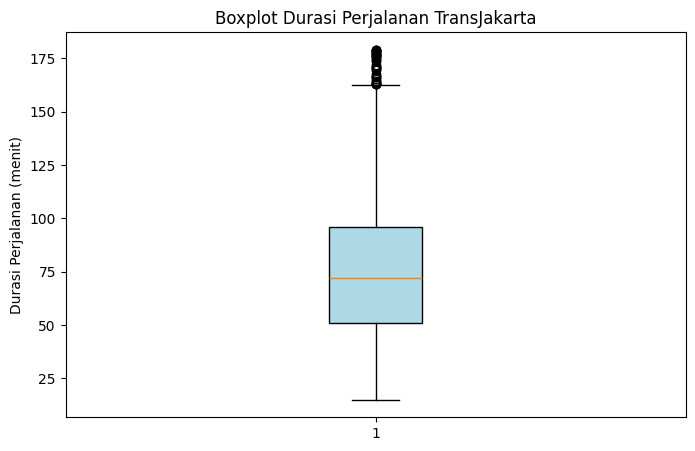

In [ ]:
# Boxplot
plt.figure(figsize=(8,5))
plt.boxplot(df_tj_clean['duration_min'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

plt.ylabel("Durasi Perjalanan (menit)")
plt.title("Boxplot Durasi Perjalanan TransJakarta")
plt.show()

ada outllier dari durasi perjalanan dimana durasi perjalanan 175 menit atau hampir 3 jam perjalanan.
coba cari tau berdasarkan jam. jam berapa yang mengahbiskan waktu perjlaanan hingga 3 jam apa yang membuatnya sampai 3 jam.

cek data yang perjalanan lebih dari 2 jam atau > 120 menit

/tmp/ipython-input-3651531034.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filter.pivot_table(values = 'duration_min',index='tapIn_hour',columns='dayName',aggfunc='mean')


dayName,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
tapIn_hour,,,,,,,
5,NaN,NaN,NaN,130.700000,130.800000,160.183333,164.716667
6,132.733333,163.783333,169.483333,162.816667,151.966667,178.800000,NaN
7,170.233333,NaN,178.650000,172.133333,NaN,135.116667,NaN
8,127.116667,NaN,136.333333,151.400000,NaN,177.166667,134.666667
9,144.166667,NaN,162.241667,176.116667,167.500000,159.550000,167.408333


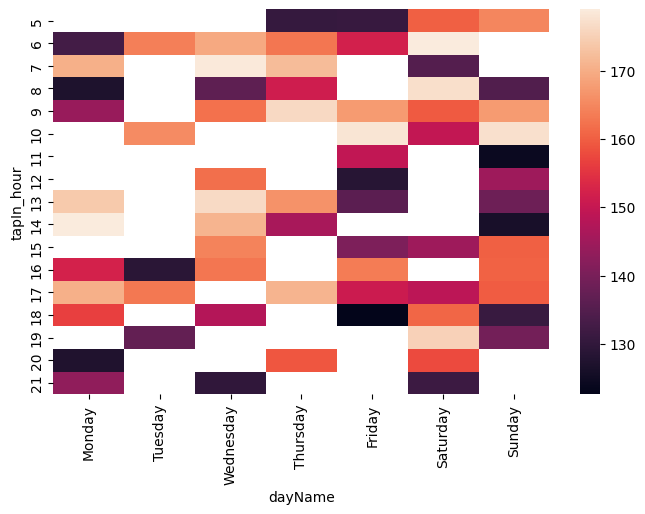

In [ ]:
#filter
#extract hour
df_filter = df_tj_clean.copy()
df_filter = df_filter[df_filter['duration_min'] > 120]
df_filter['tapIn_hour'] = pd.to_datetime(df_filter['tapInTime']).dt.hour
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_filter['dayName'] = pd.Categorical(df_filter['dayName'], categories=urutan_hari, ordered=True)
#pivottable
heatmap_data = df_filter.pivot_table(values = 'duration_min',index='tapIn_hour',columns='dayName',aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data)
heatmap_data.head()

- Rata-rata durasi perjalanan yang sangat panjang ini paling banyak terjadi pada jam 14 sampai 17 (sore hari) terutama di hari kerja (Senin sampai Jumat).

- **Warna terang pada heatmap mengindikasikan bahwa pengguna yang memulai perjalanan pada jam dan hari tersebut mengalami durasi perjalanan yang jauh lebih lama dari biasanya.**
- Hal ini dapat mengindikasikan potensi kemacetan atau gangguan lalu lintas pada waktu dan hari tersebut, namun dengan keterbatasan data, penyebab pasti dari durasi perjalanan yang lama tidak dapat diidentifikasi secara langsung.

**Oleh karena itu, diperlukan data tambahan seperti kondisi lalu lintas, kejadian gangguan, atau informasi lain di lapangan untuk mengonfirmasi penyebab lamanya durasi perjalanan.**

In [ ]:
#cek durasi perjalanan yang lebih dari 2 jam
df_tj_clean[df_tj_clean['duration_hour'] > '02:00:00']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
37600,JBXW168V4D98VE,561500422432,flazz,"Sabrina Megantara, M.Farm",F,2007,10A,Rusun Marunda - Tanjung Priok,0.0,B05078P,...,1,2023-04-30,Remaja,17:08:35,19:48:13,Sore,Malam,02:39:38,7.618848,159.633333
37604,ZJAT331Y6W27DI,6567245294939171,dki,Makuta Hasanah,M,2010,10,Tanjung Priok - PGC 2,1.0,P00042,...,0,2023-04-14,Remaja,05:40:20,07:51:08,Pagi,Pagi,02:10:48,6.388382,130.800000
37605,GBFW072V7E05FE,4721230793157234,dki,Safina Lazuardi,M,2008,11C,Rusun Pinus Elok - Rusun Pulo Gebang,0.0,B04898P,...,0,2023-04-06,Remaja,06:03:19,08:46:08,Pagi,Pagi,02:42:49,1.124985,162.816667
37607,GQAJ763W9T67MQ,4381256169826731,dki,Cawisadi Hartati,M,1972,6A,Ragunan - MH Thamrin via Kuningan,0.0,P00164,...,0,2023-04-03,Dewasa,06:24:11,08:40:36,Pagi,Pagi,02:16:25,1.783578,136.416667
37608,JPVH867T7U10EV,576927814706,flazz,Lili Siregar,M,1982,M1,Blok M - Kota,1.0,P00025,...,0,2023-04-17,Dewasa,09:19:15,12:02:28,Pagi,Siang,02:43:13,6.065434,163.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,Rusun Flamboyan - Cengkareng,1.0,B04610P,...,1,2023-04-08,Dewasa,10:46:06,13:06:42,Pagi,Siang,02:20:36,0.201712,140.600000
37888,KWQA944F9O89IN,6585885975007109,dki,Hardana Gunarto,F,1982,B14,Bekasi Barat - Kuningan,0.0,B00664P,...,0,2023-04-05,Dewasa,09:30:00,11:58:54,Pagi,Siang,02:28:54,1.399265,148.900000
37891,XQDZ821C9G88JD,2712823212983860,dki,"drg. Maras Wibowo, S.Ked",F,1966,JAK.30,Grogol - Meruya via Roxy,1.0,B01209P,...,0,2023-04-19,Dewasa,16:31:09,19:13:53,Sore,Malam,02:42:44,6.413789,162.733333
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,...,0,2023-04-19,Dewasa,08:16:10,10:32:30,Pagi,Pagi,02:16:20,0.601680,136.333333


**karena jumlah durasi perjalanan > 120 menit hanya ada 93, jadi sebaiknya di drop saja karena tidak ada informasi pasti penyebab durasi lebih dari 120 menit dan 93 rows tidak akan mempengaruhi analisis jika memang tidak ada informasi tambahan**

In [ ]:
# Hapus data dengan durasi > 2 jam
df_tj_clean.drop(df_tj_clean[df_tj_clean['duration_hour'] > '02:00:00'].index, inplace=True)

In [ ]:
df_tj_clean.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


In [ ]:
#cek ulang apakah masih ada durasi perjalanan yang lebih dari 2 jam
df_tj_clean[df_tj_clean['duration_hour'] > '02:00:00']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min


In [ ]:
df_tj_clean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,0,2023-04-03,Remaja,05:21:44,06:00:53,Pagi,Pagi,00:39:09,2.514905,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,0,2023-04-03,Dewasa,05:42:44,06:40:01,Pagi,Pagi,00:57:17,2.019439,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,0,2023-04-03,Dewasa,05:59:06,06:50:55,Pagi,Pagi,00:51:49,0.079950,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,0,2023-04-03,Dewasa,05:44:51,06:28:16,Pagi,Pagi,00:43:25,1.456400,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,0,2023-04-03,Dewasa,06:17:35,06:57:03,Pagi,Pagi,00:39:28,8.721948,39.466667


# 5. jam tersibuk / peak hour


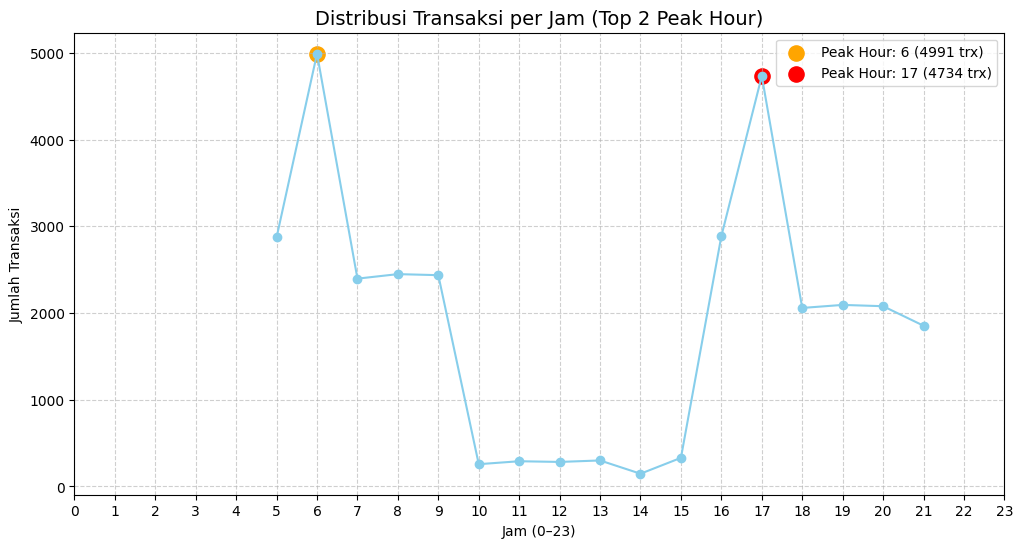

In [ ]:
import matplotlib.pyplot as plt

# Hitung transaksi per jam
hourly_counts = (
    df_tj_clean.groupby(df_tj_clean['tapInTime'].dt.hour)
    .size()
    .reset_index(name='jumlah_transaksi')
)
hourly_counts.rename(columns={hourly_counts.columns[0]: "tapIn_hour"}, inplace=True)

# Cari 2 jam dengan transaksi tertinggi
top2 = hourly_counts.nlargest(2, 'jumlah_transaksi')

# Plot
plt.figure(figsize=(12,6))
plt.plot(hourly_counts['tapIn_hour'], hourly_counts['jumlah_transaksi'],
         marker='o', linestyle='-', color='skyblue')

# Highlight top 2 peak hour
colors = ['red', 'orange']
for i, row in top2.iterrows():
    plt.scatter(row['tapIn_hour'], row['jumlah_transaksi'],
                color=colors[i % len(colors)], s=120,
                label=f"Peak Hour: {row['tapIn_hour']} ({row['jumlah_transaksi']} trx)")

plt.title('Distribusi Transaksi per Jam (Top 2 Peak Hour)', fontsize=14)
plt.xlabel('Jam (0–23)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(range(0,24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df_tj_clean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,isweekend,date_tap_in,age_category,tapIn_hour,tapOut_hour,tapIn_category,tapout_category,duration_hour,Distance,duration_min
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,0,2023-04-03,Remaja,05:21:44,06:00:53,Pagi,Pagi,00:39:09,2.514905,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,0,2023-04-03,Dewasa,05:42:44,06:40:01,Pagi,Pagi,00:57:17,2.019439,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,0,2023-04-03,Dewasa,05:59:06,06:50:55,Pagi,Pagi,00:51:49,0.079950,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,0,2023-04-03,Dewasa,05:44:51,06:28:16,Pagi,Pagi,00:43:25,1.456400,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,0,2023-04-03,Dewasa,06:17:35,06:57:03,Pagi,Pagi,00:39:28,8.721948,39.466667


<Figure size 1200x600 with 0 Axes>

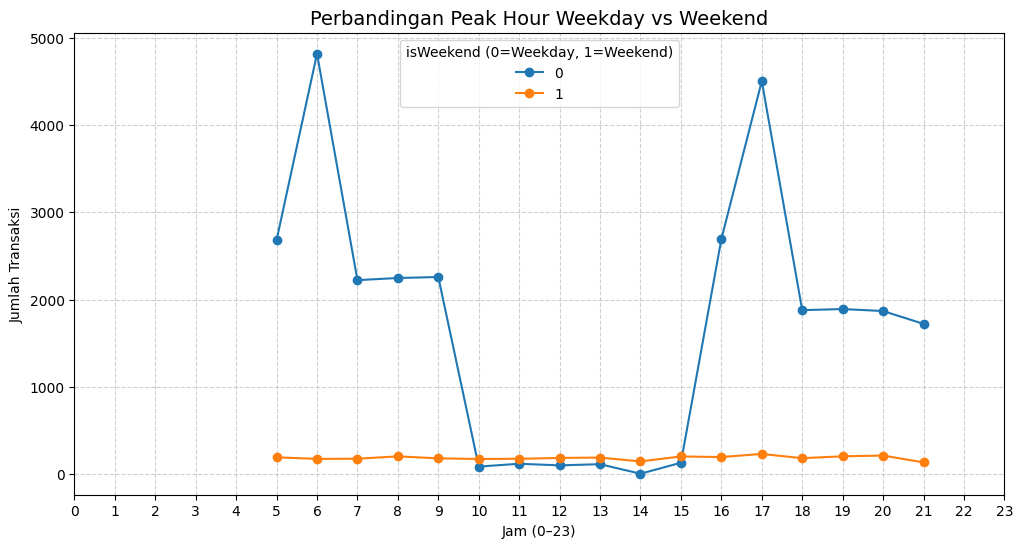

In [ ]:
import matplotlib.pyplot as plt

# Hitung transaksi per jam dan weekend/weekday
hourly_counts = df_tj_clean.groupby(
    [df_tj_clean['tapInTime'].dt.hour, 'isweekend']
)['transID'].count().reset_index(name='jumlah_transaksi')

# Pivot tabel untuk plotting
pivot_counts = hourly_counts.pivot(index='tapInTime', columns='isweekend', values='jumlah_transaksi')

# Plot line chart
plt.figure(figsize=(12,6))
pivot_counts.plot(kind='line', marker='o', figsize=(12,6))

plt.title('Perbandingan Peak Hour Weekday vs Weekend', fontsize=14)
plt.xlabel('Jam (0–23)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='isWeekend (0=Weekday, 1=Weekend)')
plt.show()

weekday ->
- Lonjakan tajam di jam 6–7 pagi → kemungkinan besar orang berangkat kerja/sekolah.

- Lonjakan lagi di jam 17–18 sore → jam pulang kantor/sekolah.

weekend ->

- Tidak ada lonjakan signifikan di jam tertentu.

- Orang cenderung menggunakan Transjakarta lebih merata sepanjang hari, mungkin untuk rekreasi, jalan santai, atau belanja.
Jadi tidak ada pola “jam sibuk” yang jelas seperti di weekdays.

# 7. gender apa pengguna yang paling banyak naik transjakarta


In [ ]:
# pengguna terbanyak berdasarkan gender
gender_count = df_tj_clean['payCardSex'].value_counts()
gender_count

,count
payCardSex,
F,17307
M,15155


Text(0.5, 1.0, 'Proporsi Gender Pengguna TransJakarta')

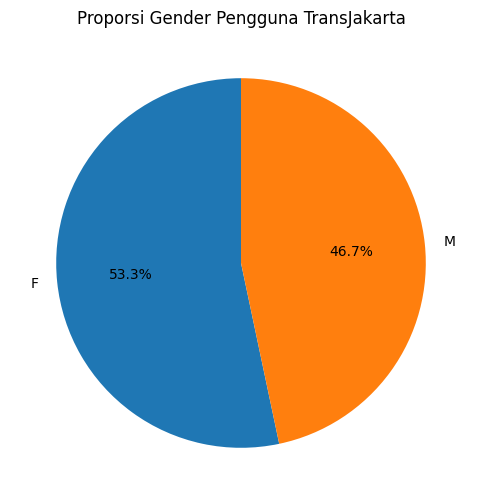

In [ ]:
#visualisasi gender paling banyak
plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Gender Pengguna TransJakarta')

# Uji inferensial

### **1. Apakah distribusi usia penumpang berbeda antara weekday & weekend?**

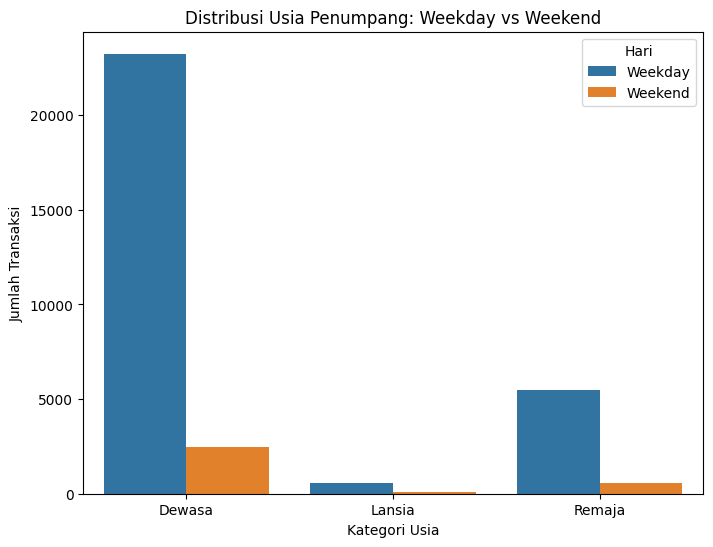

Crosstab distribusi usia × hari:
isweekend         0     1
age_category             
Dewasa        23251  2485
Lansia          584    75
Remaja         5492   575

Hasil Uji Chi-Square Usia × Hari
Chi-Square = 2.4687191367892414
p-value = 0.29102108179767255
Degrees of freedom = 2
Tidak ada perbedaan signifikan distribusi usia antara weekday dan weekend.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset asli
df_test_age = df_tj_clean.copy()
# Hitung jumlah transaksi per kategori usia × hari
age_prop = (
    df_test_age.groupby(['isweekend', 'age_category'])['transID']
    .count()
    .reset_index()
)

# Mapping label hari
age_prop['Hari'] = age_prop['isweekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=age_prop,
    x='age_category',
    y='transID',
    hue='Hari',   # pakai kolom label
    palette={'Weekday':'#1f77b4', 'Weekend':'#ff7f0e'}
)

plt.title('Distribusi Usia Penumpang: Weekday vs Weekend')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Hari')
plt.show()



# Crosstab distribusi kategori usia × hari (weekday/weekend)
age_crosstab = pd.crosstab(df_test_age['age_category'], df_test_age['isweekend'])

print("Crosstab distribusi usia × hari:")
print(age_crosstab)

from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(age_crosstab)

print("\nHasil Uji Chi-Square Usia × Hari")
print("Chi-Square =", chi2)
print("p-value =", p_value)
print("Degrees of freedom =", dof)

if p_value < 0.05:
    print("Distribusi usia berbeda signifikan antara weekday dan weekend.")
else:
    print("Tidak ada perbedaan signifikan distribusi usia antara weekday dan weekend.")

ternayata baik di weekday maupun weekend, mayoritas penumpang tetap didominasi oleh dewasa,lalu remaja, dan paling sedikit lansia.

Secara visual jumlahnya memang beda (weekday lebih banyak total transaksi), tapi pola antar usia (Dewasa > Remaja > Lansia) konsisten.

### **2.  apakah ada perbedaan signifikan rata2 jumlah tapin disemua koridor (pagi/siang/sore/malam?)**

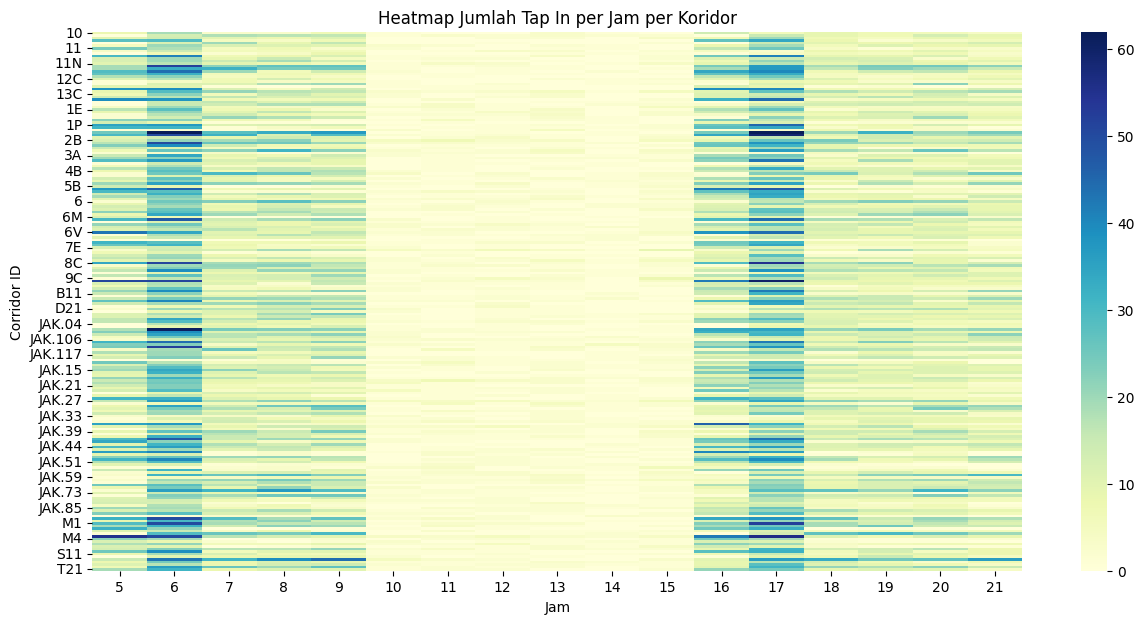

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df_hour = df_tj_clean.copy()

#  kolom jam  0–23
df_hour['tapIn_hour'] = pd.to_datetime(df_hour['tapInTime']).dt.hour

# Hitung jumlah tap in per jam per koridor
tap_in_counts = (
    df_hour
    .groupby(['corridorID', 'tapIn_hour'])['transID']
    .count()
    .reset_index()
)

# Pivot table
pivot_table = (
    tap_in_counts
    .pivot(index='corridorID', columns='tapIn_hour', values='transID')
    .fillna(0)
)

# Plot heatmap
plt.figure(figsize=(15,7))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Heatmap Jumlah Tap In per Jam per Koridor")
plt.xlabel("Jam")
plt.ylabel("Corridor ID")
plt.show()

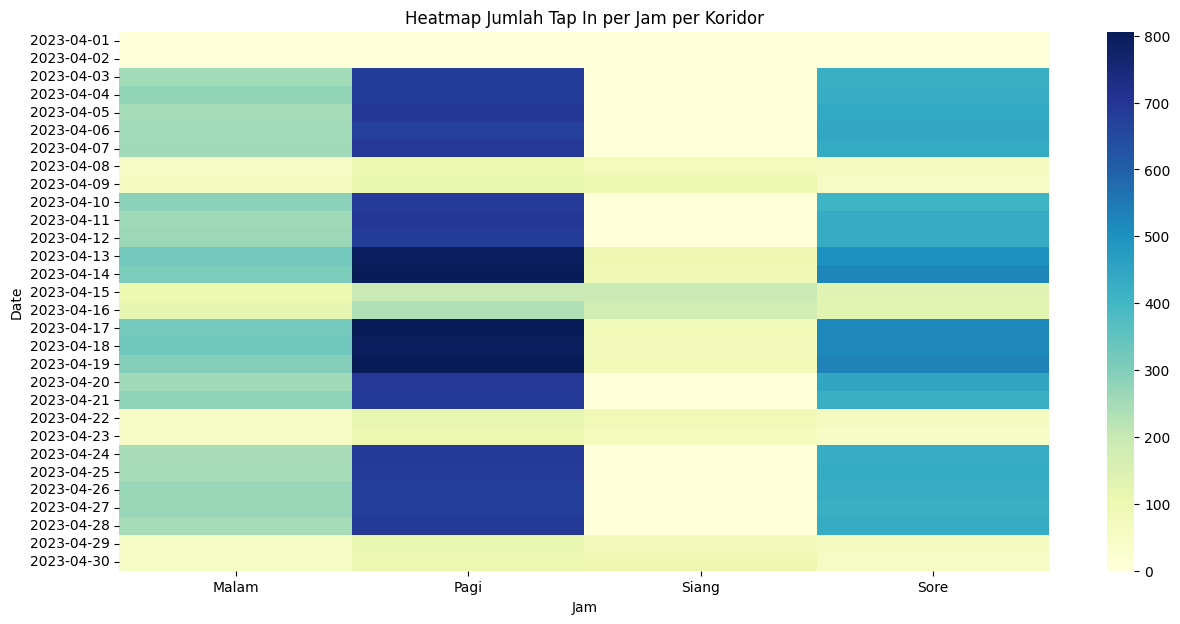

/tmp/ipython-input-2285185082.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tapIn_category", y="transID", data=anova_data, palette="Set2")


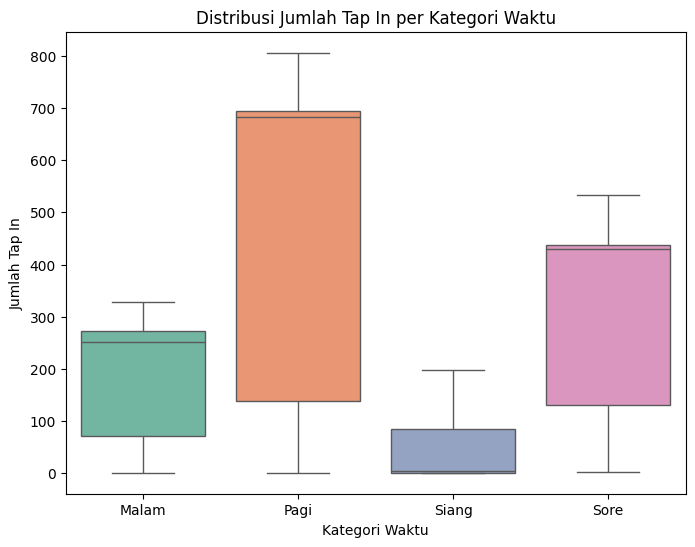

Hasil ANOVA 
F-statistic: 33.50490727738298
p-value: 1.1345193772482864e-15
Tolak H0 → Ada perbedaan signifikan rata-rata tap in antar kategori waktu


 Hasil Kruskal-Wallis
H-statistic: 52.74061374977404
p-value: 2.0823132563918092e-11
Tolak H0 → Ada perbedaan signifikan median tap in antar kategori waktu


 Post-hoc Tukey HSD
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
 Malam   Pagi  312.5667    0.0  186.6245  438.5088   True
 Malam  Siang   -152.65 0.0127 -280.8214  -24.4786   True
 Malam   Sore  132.8931 0.0366    5.8699  259.9163   True
  Pagi  Siang -465.2167    0.0  -593.388 -337.0453   True
  Pagi   Sore -179.6736  0.002 -306.6968  -52.6504   True
 Siang   Sore  285.5431    0.0  156.3093  414.7769   True
---------------------------------------------------------


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


df = df_tj_clean.copy()

# Pastikan jam 0–23
df['tapIn_hour'] = pd.to_datetime(df['tapInTime']).dt.hour

# 2. Heatmap jumlah tap in per jam
tap_in_counts = df.groupby(['date_tap_in','tapIn_category'])['transID'].count().reset_index()
pivot_table = tap_in_counts.pivot(index='date_tap_in', columns='tapIn_category', values='transID').fillna(0)

plt.figure(figsize=(15,7))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Heatmap Jumlah Tap In per Jam per Koridor")
plt.xlabel("Jam")
plt.ylabel("Date")
plt.show()

# 3. Data untuk ANOVA (pakai tapIn_category)
anova_data = df.groupby(['date_tap_in','tapIn_category'])['transID'].count().reset_index()
anova_pivot = anova_data.pivot(index='date_tap_in', columns='tapIn_category', values='transID').fillna(0)

# Boxplot jumlah tap-in per kategori waktu
plt.figure(figsize=(8,6))
sns.boxplot(x="tapIn_category", y="transID", data=anova_data, palette="Set2")
plt.title("Distribusi Jumlah Tap In per Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Tap In")
plt.show()

# ambil per kategori
pagi  = anova_pivot['Pagi']
siang = anova_pivot['Siang']
sore  = anova_pivot['Sore']
malam = anova_pivot['Malam']

# 4. Uji ANOVA
f_stat, p_val = stats.f_oneway(pagi, siang, sore, malam)
print("Hasil ANOVA ")
print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan rata-rata tap in antar kategori waktu")
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan")

print('\n')
# 5. Uji Kruskal-Wallis
h_stat, p_val = stats.kruskal(pagi, siang, sore, malam)
print(" Hasil Kruskal-Wallis")
print("H-statistic:", h_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan median tap in antar kategori waktu")
    print('\n')
    # Post-hoc Tukey HSD (hanya kalau signifikan)
    print(" Post-hoc Tukey HSD")
    tukey = pairwise_tukeyhsd(endog=anova_data['transID'],
                              groups=anova_data['tapIn_category'],
                              alpha=0.05)
    print(tukey)
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan")

- ANOVA & Kruskal-Wallis → ada perbedaan signifikan rata-rata/median jumlah tap-in antar kategori waktu.

- Post-hoc Tukey →

Hasil analisis menunjukkan bahwa
- jumlah tap in penumpang **paling tinggi terjadi pada pagi hari**, diikuti oleh **sore hari**.
- Hal ini menggambarkan bahwa jam sibuk utama pengguna Transjakarta adalah pada waktu berangkat kerja/sekolah di pagi hari serta saat pulang di sore hari. Sementara itu,** pada siang dan malam hari, aktivitas penumpang relatif lebih rendah.**

### **3. apakah ada  perbedaan rata-rata penumpang di kedua jam sibuk (6 pagi) dan (17 sore)?**

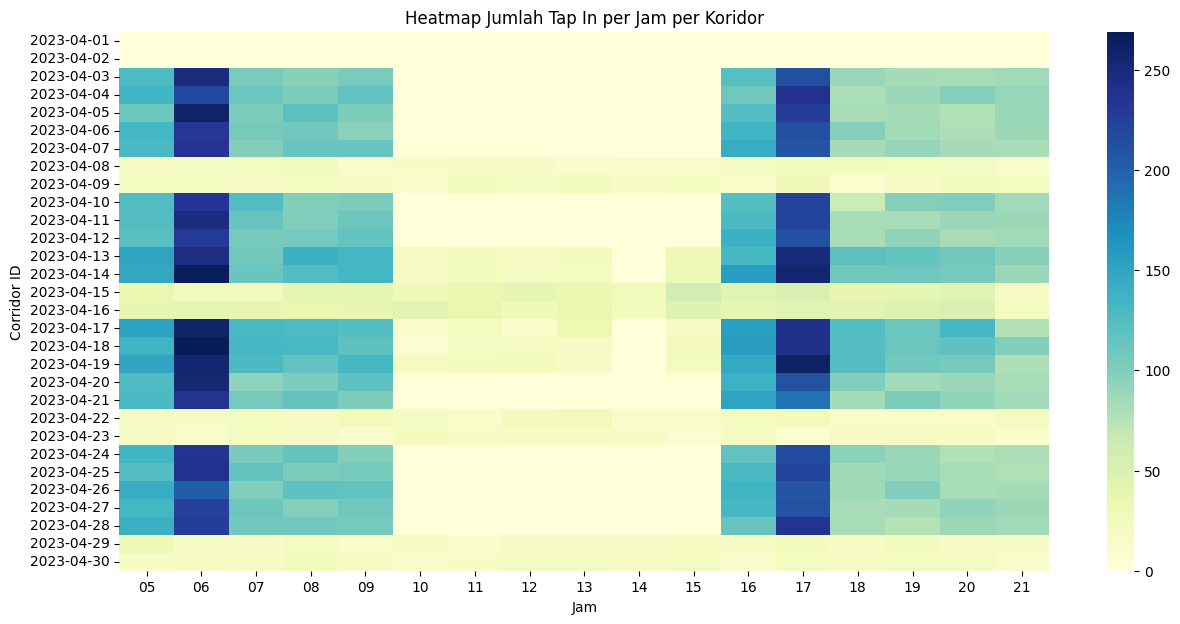

T-statistic: 0.11553675745737003
p-value: 0.9084404899555163
Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang di pagi dan sore


U-statistic: 471.0
p-value: 0.30310730226427895
Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang di pagi dan sore


In [ ]:
df_tj_clean['jam'] = df_tj_clean['tapIn_hour'].astype(str).str.slice(0,2)#ubah jadi variable jam
count_pagi_sore =df_tj_clean.groupby(['date_tap_in','jam'])['transID'].nunique().reset_index()
count_pagi = count_pagi_sore[count_pagi_sore['jam']=='06']['transID']
count_sore = count_pagi_sore[count_pagi_sore['jam']=='17']['transID']
#visualisasi heatmap
pivot_table = count_pagi_sore.pivot(index='date_tap_in', columns='jam', values='transID').fillna(0)

plt.figure(figsize=(15,7))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Heatmap Jumlah Tap In per Jam per Koridor")
plt.xlabel("Jam")
plt.ylabel("Corridor ID")
plt.show()



#uji T-tes
t_stats, p_value = stats.ttest_ind(count_pagi, count_sore)

print("T-statistic:", t_stats)
print("p-value:", p_value)

if p_value < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan rata-rata jumlah penumpang di pagi dan sore")
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang di pagi dan sore")

print('\n')
#uji man-whitney
u_stats, p_value = stats.mannwhitneyu(count_pagi, count_sore)

print("U-statistic:", u_stats)
print("p-value:", p_value)

if p_value < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan rata-rata jumlah penumpang di pagi dan sore")
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang di pagi dan sore")

Kalau diuji secara statistik, ternyata jumlah penumpang di pagi dan sore itu nggak berbeda signifikan. Artinya, walaupun sama-sama terlihat sibuk, secara data keduanya punya tingkat kepadatan yang mirip.

###**4. hari yang paling sibuk**

Hasil ANOVA 
F-statistic: 0.00022927143543323238
p-value: 0.9999998922755303
Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang antara hari-hari di weekdays
 Hasil Kruskal-Wallis
H-statistic: 0.05496045218532316
p-value: 0.9996292651708816
Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang antara hari-hari di weekdays


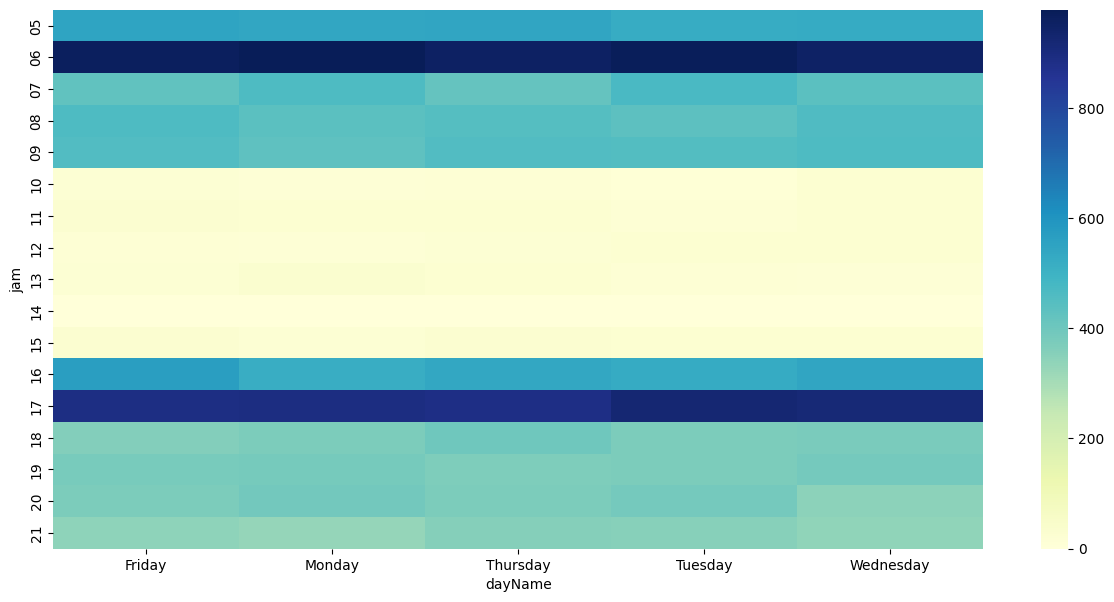

In [ ]:
df_weekdays = df_tj_clean[df_tj_clean['isweekend'] == 0]

df_weekdays = df_weekdays.groupby(['dayName','jam'])['transID'].nunique().reset_index()



#heatmap
pivot_table = df_weekdays.pivot(index='jam', columns='dayName', values='transID').fillna(0)

plt.figure(figsize=(15,7))
sns.heatmap(pivot_table, cmap="YlGnBu")



#uji anova
anova_data = df_weekdays.pivot(index='jam', columns='dayName', values='transID').fillna(0)
# ambil per kategori
Monday  = anova_data.reset_index()['Monday']
Tuesday = anova_data.reset_index()['Tuesday']
Wednesday  = anova_data.reset_index()['Wednesday']
Thursday = anova_data.reset_index()['Thursday']
Friday = anova_data.reset_index()['Friday']

f_stat, p_val = stats.f_oneway(Monday,Tuesday,Wednesday,Thursday,Friday)
print("Hasil ANOVA ")
print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan rata-rata jumlah penumpang antara hari-hari di weekdays")
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang antara hari-hari di weekdays")

    # 5. Uji Kruskal-Wallis
h_stat, p_val = stats.kruskal(Monday,Tuesday,Wednesday,Thursday,Friday)
print(" Hasil Kruskal-Wallis")
print("H-statistic:", h_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan rata-rata jumlah penumpang antara hari-hari di weekdays")
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan rata-rata jumlah penumpang antara hari-hari di weekdays")

Hasil uji Kruskal-Wallis menunjukkan bahwa **tidak terdapat perbedaan signifikan pada rata-rata jumlah penumpang antar hari pada weekdays** (p-value = 0.999 > 0.05). Dengan demikian, tingkat kepadatan penumpang relatif konsisten dari Senin hingga Jumat.

Visualisasi heatmap juga memperkuat temuan ini: **pola kepadatan terlihat mirip pada setiap hari kerja**, dengan lonjakan penumpang terjadi di pagi hari sekitar pukul 06.00–08.00 dan sore hari sekitar pukul 17.00–19.00.

In [ ]:
from google.colab import files
df_tj_clean.to_csv('df_tj_clean.csv', index=False)
files.download('df_tj_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

rata-rata penumpang di jam 6 pagi dan 17 sore tidak ada perbedaan

# Kesimpulan Anlalisis

**1. Profil Penumpang**

- Dari total **32.555** transaksi, mayoritas pengguna adalah dewasa usia produktif dengan rata-rata usia **33 tahun**.

- **Bank DKI** mendominasi sebagai metode pembayaran, sejalan dengan kerja sama resmi dengan Transjakarta.

**2. Pola Penggunaan**

- Transjakarta lebih sering digunakan pada **hari kerja (weekdays)** dibanding akhir pekan.

- R**ute Cibubur–Balaikota** dan **Ciputat** adalah rute dengan kepadatan tertinggi, sedangkan **Kampung Rambutan–Blok M** termasuk paling sepi dengan rata-rata ±17 transaksi per hari.

**3. Subsidi dan Koridor Gratis**

- Proporsi pengguna **gratis vs berbayar** hampir seimbang, menunjukkan tingginya pemanfaatan subsidi.

- Penerima subsidi gratis didominasi dewasa, **lansia hanya ±1% dari transaksi**.

- Distribusi **penerima subsidi** tidak murni berdasarkan usia atau pekerjaan, melainkan terkait koridor tertentu:

  - Ada koridor yang sepenuhnya gratis, misalnya JAK (mikrotrans) dan BW9 (bus wisata).

  - Ada pula koridor yang melayani wilayah rusun, di mana penghuni rusun memang berhak mendapat subsidi.

**4. Pola Jam Sibuk**

- Aktivitas tap-in meningkat tajam pada **pagi (06.00–09.00)** dan **sore (16.00–19.00)**, sesuai jam kerja/sekolah.

- ini dibuktikan berdasarkan **ANOVA (p < 0,05)** membuktikan adanya perbedaan signifikan antar waktu.
lalu diperkuat dengan Uji Tukey yang menunjukkan bahwa:

**Pagi** → signifikan lebih tinggi dibanding semua waktu → jam sibuk utama.

**Siang** → signifikan lebih rendah dibanding semua waktu→ periode paling sepi.

**Sore & Malam**→ tidak berbeda signifikan → level menengah yang serupa.

Kesimpulan: distribusi penumpang **tidak merata sepanjang hari**, terkonsentrasi pada **pagi**, relatif stabil di **sore–malam**, dan minimum di **siang**.

# Rekomendasi

- fokus Peningkatan armada sebaiknya difokuskan di jam sibuk pagi & sore dihari kerja dimana jam sibuk adalah jam 6 pagi dan 17 sore, dan beri strategi promosi/tarif khusus di weekend untuk menarik lebih banyak penumpang.

- Koridor dengan aktivitas tinggi di dua waktu tersebut menjadi prioritas utama dalam alokasi sumber daya.

- untuk rute yang sepi mungkin bisa di evaluasi misalnya melakukan penyesuaian jadwal
- berdasarkan proporsi jumlah gender, penumpang transjakarta dimana female itu 53% dan male 46%, berarti transjakarta harus menyediakan space khusus perempuan, pembagian spacenya 50:50 harus seimbang antara gender. dan harus di optimalkan

#